# 1 Initialize

In [1]:
visible_devices = 1
print("Visible devices:", visible_devices)
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing re...")
import re
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = str(visible_devices)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../../')
import GenerativeModelsMetrics as GMetrics # type: ignore
from GenerativeModelsMetrics.utils import se_mean, se_std

paper_fig_dir = "../../../NormalizingFlows/papers/NFHD/figures/"

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
gpu_models = get_gpu_info()
if gpu_models:
    training_device = gpu_models[eval(os.environ["CUDA_VISIBLE_DEVICES"])]
    print("Successfully loaded GPU model: {}".format(training_device))
else:
    training_device = 'undetermined'
    print("Failed to load GPU model. Defaulting to 'undetermined'.")
    
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

Visible devices: 1
2023-08-25 11:41:38.233310: Importing os...
2023-08-25 11:41:38.233497: Importing re...
2023-08-25 11:41:38.233631: Importing timer from timeit...
2023-08-25 11:41:38.233797: Setting env variables for tf import (only device 1 will be available)...
2023-08-25 11:41:38.234044: Importing numpy...


2023-08-25 11:41:38.401796: Importing matplotlib...
2023-08-25 11:41:38.808312: Importing sys...
2023-08-25 11:41:38.808529: Importing h5py...
2023-08-25 11:41:38.831189: Importing importlib.util...
2023-08-25 11:41:38.831311: Importing json...
2023-08-25 11:41:38.831390: Importing pandas...
2023-08-25 11:41:39.097169: Importing random...
2023-08-25 11:41:39.097377: Importing scipy utils...
2023-08-25 11:41:39.434810: Importing subprocess...
2023-08-25 11:41:39.434985: Importing tensorflow...
Tensorflow version: 2.12.0
2023-08-25 11:41:41.561732: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2023-08-25 11:41:41.744371: Importing timeit...
2023-08-25 11:41:41.744446: Importing tqdm...
2023-08-25 11:41:41.747075: Importing typing...
2023-08-25 11:41:41.747159: Setting tf configs...
2023-08-25 11:41:41.934025: Importing GMetrics module...
Successfully loaded GPU model: NVIDIA A40
2023-08-25 11:41:42.197080: All done.


# 2 KS-test

## 2.1 Define distribution

In [2]:
ncomp = 3
ndims = 64
seed = 0
#loc = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
#scale = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
#dist = tfp.distributions.Normal(loc=loc, scale=scale)
dist = MixtureDistributions.MixtureGaussian(ncomp,ndims,seed)
print(dist.dtype)

<dtype: 'float64'>


## 2.2 Test Runs

### Run test with TensorFlow (small sample with numerical distribution)

In [3]:
dist_1 = tf.cast(dist.sample(1e6),tf.float64)
dist_2 = tf.cast(dist.sample(1e6),tf.float64)

In [4]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                      dist_2_input = dist_2,
                                                      niter = 10,
                                                      batch_size = 100000,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)
print("small_sample",TwoSampleTestInputs_tf.small_sample)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.


nsamples 1000000
batch_size 100000
niter 10
niter * batch_size 1000000
small_sample True


In [5]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            progress_bar = True,
                            verbose = True)
SWDMetric_tf = GMetrics.SWDMetric(TwoSampleTestInputs_tf,
                                  progress_bar = True,
                                  verbose = True)

progress_bar is disabled when using tensorflow mode.
progress_bar is disabled when using tensorflow mode.


In [6]:
SWDMetric_tf.Test_np()

Starting SWD metric calculation...
niter = 10
batch_size = 100000
Running numpy SWD calculation...


In [ ]:
res = SWDMetric_tf.Results[-1].result_value
print("Keys:", list(res.keys()))
print("Value dtype:", [type(x) for x in list(res.values())])
print("Value shape:", [x.shape for x in list(res.values())])

Keys: ['metric_lists', 'metric_means', 'metric_stds']
Value dtype: [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
Value shape: [(10, 100), (10,), (10,)]


In [ ]:
SWDMetric_tf.Test_tf()

Starting SWD metric calculation...
Running TF SWD calculation...
niter = 10
batch_size = 100000
Running compute_test
SWD metric calculation completed in 2.3220296199433506 seconds.


In [ ]:
res = SWDMetric_tf.Results[-1].result_value
print("Keys:", list(res.keys()))
print("Value dtype:", [type(x) for x in list(res.values())])
print("Value shape:", [x.shape for x in list(res.values())])

Keys: ['metric_lists', 'metric_means', 'metric_stds']
Value dtype: [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
Value shape: [(10, 100), (10,), (10,)]


In [ ]:
KSTest_tf.Test_np()

Starting KS tests calculation...
niter = 10
batch_size = 100000
Running numpy KS tests...
Two-sample test calculation completed in 18.85052930295933 seconds.


In [ ]:
res = KSTest_tf.Results[-1].result_value
print("Keys:", list(res.keys()))
print("Value dtype:", [type(x) for x in list(res.values())])
print("Value shape:", [x.shape for x in list(res.values())])

Keys: ['statistic_lists', 'statistic_means', 'statistic_stds', 'pvalue_lists', 'pvalue_means', 'pvalue_stds']
Value dtype: [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
Value shape: [(10, 64), (10,), (10,), (10, 64), (10,), (10,)]


In [ ]:
KSTest_tf.Test_tf()

Starting KS tests calculation...
Running TF KS tests...
niter = 10
batch_size = 100000
Running compute_test
KS tests calculation completed in 4.861178991966881 seconds.


In [ ]:
res = KSTest_tf.Results[-1].result_value
print("Keys:", list(res.keys()))
print("Value dtype:", [type(x) for x in list(res.values())])
print("Value shape:", [x.shape for x in list(res.values())])

Keys: ['statistic_lists', 'statistic_means', 'statistic_stds', 'pvalue_lists', 'pvalue_means', 'pvalue_stds']
Value dtype: [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
Value shape: [(10, 64), (10,), (10,), (10, 64), (10,), (10,)]


In [ ]:
#tf.config.run_functions_eagerly(True)
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_tf(max_vectorize = 1e4)

Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 10000


Running compute_test
KS tests calculation completed in 8.943242789944634 seconds.


In [ ]:
res = KSTest_tf.Results[-1].result_value
res

{'statistic_lists': <tf.Tensor: shape=(100, 64), dtype=float64, numpy=
 array([[0.0126    , 0.00989997, 0.00709999, ..., 0.00670001, 0.0072    ,
         0.00870001],
        [0.0108    , 0.01380002, 0.0176    , ..., 0.017     , 0.02090001,
         0.02380002],
        [0.01500005, 0.01240003, 0.01169997, ..., 0.01450002, 0.02070004,
         0.01950002],
        ...,
        [0.00920004, 0.00819999, 0.00999999, ..., 0.00980002, 0.0108    ,
         0.01010001],
        [0.01210004, 0.01899999, 0.00800002, ..., 0.01349999, 0.01550001,
         0.01160002],
        [0.00819999, 0.00640005, 0.0138    , ..., 0.01409996, 0.0097    ,
         0.0073    ]])>,
 'statistic_means': <tf.Tensor: shape=(100,), dtype=float64, numpy=
 array([0.00994688, 0.01460782, 0.01315001, 0.01218282, 0.01570469,
        0.01184376, 0.00999845, 0.01047345, 0.01233594, 0.00977813,
        0.01494219, 0.01117813, 0.01032188, 0.01087188, 0.01008126,
        0.01605469, 0.01245625, 0.01254219, 0.01423907, 0.0093296

In [ ]:
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_np()

Starting KS tests calculation...
niter = 100
batch_size = 10000
Running numpy KS tests...
Two-sample test calculation completed in 26.093782150070183 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

{'statistic_lists': [[0.0113,
   0.0091,
   0.0121,
   0.0095,
   0.0131,
   0.0082,
   0.0073,
   0.008,
   0.0179,
   0.0076,
   0.0106,
   0.006,
   0.0083,
   0.009,
   0.0094,
   0.0113,
   0.0102,
   0.0118,
   0.0103,
   0.0156,
   0.0146,
   0.0093,
   0.0163,
   0.0105,
   0.0106,
   0.0116,
   0.0128,
   0.0061,
   0.0135,
   0.0125,
   0.0081,
   0.0113,
   0.0088,
   0.0103,
   0.0071,
   0.0126,
   0.0095,
   0.01,
   0.0106,
   0.0065,
   0.0108,
   0.0075,
   0.0129,
   0.0081,
   0.0187,
   0.0127,
   0.008,
   0.0086,
   0.0095,
   0.0101,
   0.008,
   0.0128,
   0.0104,
   0.0082,
   0.0071,
   0.0072,
   0.0072,
   0.0084,
   0.0089,
   0.0118,
   0.0094,
   0.0071,
   0.0084,
   0.0101],
  [0.0177,
   0.0102,
   0.0175,
   0.0152,
   0.0136,
   0.0137,
   0.0111,
   0.0154,
   0.0169,
   0.0132,
   0.0103,
   0.0164,
   0.0173,
   0.0123,
   0.0112,
   0.0149,
   0.0126,
   0.0128,
   0.0108,
   0.0099,
   0.0171,
   0.0158,
   0.0112,
   0.0183,
   0.0128,
   0.013

In [ ]:
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_tf(max_vectorize = 100)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 10000


Running compute_paired
nchunks = 100
Iterating from 0 to 1 out of 100 .
Iterating from 1 to 2 out of 100 .
Iterating from 2 to 3 out of 100 .
Iterating from 3 to 4 out of 100 .
Iterating from 4 to 5 out of 100 .
Iterating from 5 to 6 out of 100 .
Iterating from 6 to 7 out of 100 .
Iterating from 7 to 8 out of 100 .
Iterating from 8 to 9 out of 100 .
Iterating from 9 to 10 out of 100 .
Iterating from 10 to 11 out of 100 .
Iterating from 11 to 12 out of 100 .
Iterating from 12 to 13 out of 100 .
Iterating from 13 to 14 out of 100 .
Iterating from 14 to 15 out of 100 .
Iterating from 15 to 16 out of 100 .
Iterating from 16 to 17 out of 100 .
Iterating from 17 to 18 out of 100 .
Iterating from 18 to 19 out of 100 .
Iterating from 19 to 20 out of 100 .
Iterating from 20 to 21 out of 100 .
Iterating from 21 to 22 out of 100 .
Iterating from 22 to 23 out of 100 .
Iterating from 23 to 24 out of 100 .
Iterating from 24 to 25 out of 100 .
Iterating from 25 to 26 out of 100 .
Iterating from 26 to

In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(100, 2), dtype=float64, numpy=
array([[0.01031201, 0.67129015],
       [0.01015101, 0.67104394],
       [0.013175  , 0.41371527],
       [0.010422  , 0.64504816],
       [0.011554  , 0.55423596],
       [0.00995901, 0.70037811],
       [0.01644101, 0.21484341],
       [0.01053601, 0.63903874],
       [0.01260001, 0.44777809],
       [0.010005  , 0.68892597],
       [0.01065801, 0.63054504],
       [0.014271  , 0.32008627],
       [0.011276  , 0.58127398],
       [0.014679  , 0.27719115],
       [0.01762901, 0.16692894],
       [0.01346001, 0.39075064],
       [0.01140501, 0.57019286],
       [0.01103801, 0.59233729],
       [0.01020301, 0.67124867],
       [0.01154   , 0.56196635],
       [0.01276601, 0.43879584],
       [0.01647501, 0.22029589],
       [0.010835  , 0.61251955],
       [0.01693501, 0.17246831],
       [0.011599  , 0.54365437],
       [0.011803  , 0.54000554],
       [0.01068501, 0.63248491],
       [0.01164301, 0.53759788],
       [0.010856  , 0.6162

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 1e4)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 10000


Running compute_paired
KS tests calculation completed in 7.097774542984553 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(100, 2), dtype=float64, numpy=
array([[0.01225801, 0.47336315],
       [0.01055701, 0.6305749 ],
       [0.01183801, 0.5262631 ],
       [0.01003501, 0.67906922],
       [0.010315  , 0.67473071],
       [0.01514901, 0.25291749],
       [0.00996301, 0.6936809 ],
       [0.01214601, 0.49604114],
       [0.01169801, 0.54966044],
       [0.01037901, 0.65522923],
       [0.01067001, 0.62242378],
       [0.01074301, 0.62072352],
       [0.01547101, 0.26873263],
       [0.010235  , 0.68033009],
       [0.010796  , 0.63358039],
       [0.010593  , 0.63903462],
       [0.01048201, 0.65087907],
       [0.01268001, 0.46307266],
       [0.010995  , 0.61245762],
       [0.01360401, 0.38066383],
       [0.01047301, 0.65212372],
       [0.01153401, 0.5517672 ],
       [0.012077  , 0.49401494],
       [0.010822  , 0.61563623],
       [0.011766  , 0.52608563],
       [0.009981  , 0.69285757],
       [0.010714  , 0.6257058 ],
       [0.01016401, 0.68393043],
       [0.01324601, 0.3944

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 100)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 10000


Running compute_paired
nchunks = 100
Iterating from 0 to 1 out of 100 .
Iterating from 1 to 2 out of 100 .
Iterating from 2 to 3 out of 100 .
Iterating from 3 to 4 out of 100 .
Iterating from 4 to 5 out of 100 .
Iterating from 5 to 6 out of 100 .
Iterating from 6 to 7 out of 100 .
Iterating from 7 to 8 out of 100 .
Iterating from 8 to 9 out of 100 .
Iterating from 9 to 10 out of 100 .
Iterating from 10 to 11 out of 100 .
Iterating from 11 to 12 out of 100 .
Iterating from 12 to 13 out of 100 .
Iterating from 13 to 14 out of 100 .
Iterating from 14 to 15 out of 100 .
Iterating from 15 to 16 out of 100 .
Iterating from 16 to 17 out of 100 .
Iterating from 17 to 18 out of 100 .
Iterating from 18 to 19 out of 100 .
Iterating from 19 to 20 out of 100 .
Iterating from 20 to 21 out of 100 .
Iterating from 21 to 22 out of 100 .
Iterating from 22 to 23 out of 100 .
Iterating from 23 to 24 out of 100 .
Iterating from 24 to 25 out of 100 .
Iterating from 25 to 26 out of 100 .
Iterating from 26 to

In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(100, 2), dtype=float64, numpy=
array([[0.01031201, 0.67129015],
       [0.01015101, 0.67104394],
       [0.013175  , 0.41371527],
       [0.010422  , 0.64504816],
       [0.011554  , 0.55423596],
       [0.00995901, 0.70037811],
       [0.01644101, 0.21484341],
       [0.01053601, 0.63903874],
       [0.01260001, 0.44777809],
       [0.010005  , 0.68892597],
       [0.01065801, 0.63054504],
       [0.014271  , 0.32008627],
       [0.011276  , 0.58127398],
       [0.014679  , 0.27719115],
       [0.01762901, 0.16692894],
       [0.01346001, 0.39075064],
       [0.01140501, 0.57019286],
       [0.01103801, 0.59233729],
       [0.01020301, 0.67124867],
       [0.01154   , 0.56196635],
       [0.01276601, 0.43879584],
       [0.01647501, 0.22029589],
       [0.010835  , 0.61251955],
       [0.01693501, 0.17246831],
       [0.011599  , 0.54365437],
       [0.011803  , 0.54000554],
       [0.01068501, 0.63248491],
       [0.01164301, 0.53759788],
       [0.010856  , 0.6162

In [ ]:
KSTest_tf.Results.results_df

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-26T13:12:10.785227,KS Test_tf,"((tf.Tensor(0.012258008420467377, shape=(), dt...",False,False,100,100,10000,<dtype: 'float64'>,True,100,10000,6.768056,tensorflow
0,2023-07-26T13:13:07.105435,KS Test_tf,"((tf.Tensor(0.012258008420467377, shape=(), dt...",False,False,100,100,10000,<dtype: 'float64'>,False,100,10000,7.097775,tensorflow
0,2023-07-26T13:12:59.861546,KS Test_tf,"((tf.Tensor(0.010312005877494812, shape=(), dt...",False,False,100,100,10000,<dtype: 'float64'>,True,100,10000,8.270621,tensorflow
0,2023-07-26T13:13:15.796341,KS Test_tf,"((tf.Tensor(0.010312005877494812, shape=(), dt...",False,False,100,100,10000,<dtype: 'float64'>,False,100,10000,8.559257,tensorflow
0,2023-07-26T13:12:51.465255,KS Test_np,"[[0.010311999999999998, 0.6713097323434606], [...",False,False,100,100,10000,<dtype: 'float64'>,True,100,10000,40.199856,numpy


### Run test with TensorFlow (small sample with symbolic distribution)

In [ ]:
dist_1 = dist
dist_2 = dist

In [ ]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                      dist_2_input = dist_2,
                                                      niter = 100,
                                                      batch_size = 10000,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)
print("small_sample",TwoSampleTestInputs_tf.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 1000000
batch_size 10000
niter 100
niter * batch_size 1000000
small_sample True


In [ ]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            progress_bar = True,
                            verbose = True)

progress_bar is disabled when using tensorflow mode.


In [ ]:
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_tf(max_vectorize = 1e4)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 10000
Running compute_paired
KS tests calculation completed in 7.925949883996509 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(100, 2), dtype=float64, numpy=
array([[0.013958  , 0.3484051 ],
       [0.012976  , 0.4280491 ],
       [0.012272  , 0.47860756],
       [0.01563   , 0.25360031],
       [0.00966401, 0.72154935],
       [0.01421601, 0.33807853],
       [0.01279401, 0.44211177],
       [0.010633  , 0.63349114],
       [0.01473101, 0.28809019],
       [0.01037401, 0.65740794],
       [0.01357401, 0.36444225],
       [0.011284  , 0.57487665],
       [0.01155501, 0.56638191],
       [0.01602501, 0.20730774],
       [0.01045201, 0.65287257],
       [0.012975  , 0.44121909],
       [0.01142901, 0.55737528],
       [0.010783  , 0.62594309],
       [0.015181  , 0.28414489],
       [0.01050301, 0.65136774],
       [0.01035   , 0.66445382],
       [0.01580001, 0.26920807],
       [0.011669  , 0.53021764],
       [0.01211401, 0.48934753],
       [0.013138  , 0.41046721],
       [0.01124401, 0.5848735 ],
       [0.010397  , 0.65559516],
       [0.01150201, 0.55869739],
       [0.011387  , 0.5720

In [ ]:
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_tf(max_vectorize = 100)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 10000
Running compute_paired
nchunks = 100
Iterating from 0 to 1 out of 100 .
Iterating from 1 to 2 out of 100 .
Iterating from 2 to 3 out of 100 .
Iterating from 3 to 4 out of 100 .
Iterating from 4 to 5 out of 100 .
Iterating from 5 to 6 out of 100 .
Iterating from 6 to 7 out of 100 .
Iterating from 7 to 8 out of 100 .
Iterating from 8 to 9 out of 100 .
Iterating from 9 to 10 out of 100 .
Iterating from 10 to 11 out of 100 .
Iterating from 11 to 12 out of 100 .
Iterating from 12 to 13 out of 100 .
Iterating from 13 to 14 out of 100 .
Iterating from 14 to 15 out of 100 .
Iterating from 15 to 16 out of 100 .
Iterating from 16 to 17 out of 100 .
Iterating from 17 to 18 out of 100 .
Iterating from 18 to 19 out of 100 .
Iterating from 19 to 20 out of 100 .
Iterating from 20 to 21 out of 100 .
Iterating from 21 to 22 out of 100 .
Iterating from 22 to 23 out of 100 .
Iterating from 23 to 24 out o

In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(100, 2), dtype=float64, numpy=
array([[0.012595  , 0.44165123],
       [0.01210001, 0.50015221],
       [0.01660701, 0.23974179],
       [0.015072  , 0.28225793],
       [0.015013  , 0.29058172],
       [0.01102   , 0.6000625 ],
       [0.011919  , 0.51906741],
       [0.011265  , 0.59279856],
       [0.011233  , 0.59072352],
       [0.01225101, 0.48514509],
       [0.01115301, 0.58587523],
       [0.013003  , 0.43353016],
       [0.01060501, 0.64031256],
       [0.01050101, 0.64627259],
       [0.01406901, 0.34524818],
       [0.01028701, 0.66273819],
       [0.01071901, 0.62513501],
       [0.01417001, 0.33415449],
       [0.01147701, 0.54306728],
       [0.01207601, 0.5148746 ],
       [0.010995  , 0.60545013],
       [0.01261401, 0.44804966],
       [0.010183  , 0.67130671],
       [0.011268  , 0.57789479],
       [0.01190401, 0.52130966],
       [0.012238  , 0.48497869],
       [0.011718  , 0.53282588],
       [0.011464  , 0.5515892 ],
       [0.018024  , 0.1633

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 1e4)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 10000


Running compute_paired
KS tests calculation completed in 7.71245849900879 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(100, 2), dtype=float64, numpy=
array([[0.012903  , 0.42627374],
       [0.01475601, 0.28552805],
       [0.014946  , 0.27437911],
       [0.01142901, 0.56159497],
       [0.01054701, 0.64591294],
       [0.011021  , 0.59713167],
       [0.01077   , 0.61513909],
       [0.01213601, 0.50575925],
       [0.010929  , 0.60683699],
       [0.01134   , 0.56470728],
       [0.011004  , 0.60084452],
       [0.010721  , 0.6244051 ],
       [0.01201501, 0.50185331],
       [0.01058001, 0.63866365],
       [0.013184  , 0.40923294],
       [0.01145301, 0.56296173],
       [0.01182501, 0.52618392],
       [0.015372  , 0.2602825 ],
       [0.01174901, 0.52007536],
       [0.01005501, 0.68692737],
       [0.01141601, 0.56531704],
       [0.010124  , 0.6858173 ],
       [0.01406101, 0.352122  ],
       [0.014189  , 0.31378965],
       [0.01221001, 0.48412464],
       [0.01075   , 0.62196528],
       [0.01003701, 0.68885751],
       [0.01011501, 0.67924329],
       [0.01057901, 0.6413

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 100)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 10000


Running compute_paired
nchunks = 100
Iterating from 0 to 1 out of 100 .
Iterating from 1 to 2 out of 100 .
Iterating from 2 to 3 out of 100 .
Iterating from 3 to 4 out of 100 .
Iterating from 4 to 5 out of 100 .
Iterating from 5 to 6 out of 100 .
Iterating from 6 to 7 out of 100 .
Iterating from 7 to 8 out of 100 .
Iterating from 8 to 9 out of 100 .
Iterating from 9 to 10 out of 100 .
Iterating from 10 to 11 out of 100 .
Iterating from 11 to 12 out of 100 .
Iterating from 12 to 13 out of 100 .
Iterating from 13 to 14 out of 100 .
Iterating from 14 to 15 out of 100 .
Iterating from 15 to 16 out of 100 .
Iterating from 16 to 17 out of 100 .
Iterating from 17 to 18 out of 100 .
Iterating from 18 to 19 out of 100 .
Iterating from 19 to 20 out of 100 .
Iterating from 20 to 21 out of 100 .
Iterating from 21 to 22 out of 100 .
Iterating from 22 to 23 out of 100 .
Iterating from 23 to 24 out of 100 .
Iterating from 24 to 25 out of 100 .
Iterating from 25 to 26 out of 100 .
Iterating from 26 to

In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(100, 2), dtype=float64, numpy=
array([[0.012595  , 0.44165123],
       [0.01210001, 0.50015221],
       [0.01660701, 0.23974179],
       [0.015072  , 0.28225793],
       [0.015013  , 0.29058172],
       [0.01102   , 0.6000625 ],
       [0.011919  , 0.51906741],
       [0.011265  , 0.59279856],
       [0.011233  , 0.59072352],
       [0.01225101, 0.48514509],
       [0.01115301, 0.58587523],
       [0.013003  , 0.43353016],
       [0.01060501, 0.64031256],
       [0.01050101, 0.64627259],
       [0.01406901, 0.34524818],
       [0.01028701, 0.66273819],
       [0.01071901, 0.62513501],
       [0.01417001, 0.33415449],
       [0.01147701, 0.54306728],
       [0.01207601, 0.5148746 ],
       [0.010995  , 0.60545013],
       [0.01261401, 0.44804966],
       [0.010183  , 0.67130671],
       [0.011268  , 0.57789479],
       [0.01190401, 0.52130966],
       [0.012238  , 0.48497869],
       [0.011718  , 0.53282588],
       [0.011464  , 0.5515892 ],
       [0.018024  , 0.1633

In [ ]:
KSTest_tf.Results.results_df

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-26T13:15:17.563703,KS Test_tf,"((tf.Tensor(0.012903004735708237, shape=(), dt...",True,True,100,100,10000,<dtype: 'float64'>,False,100,10000,7.712458,tensorflow
0,2023-07-26T13:14:59.922817,KS Test_tf,"((tf.Tensor(0.013958004415035247, shape=(), dt...",True,True,100,100,10000,<dtype: 'float64'>,True,100,10000,7.92595,tensorflow
0,2023-07-26T13:15:09.621906,KS Test_tf,"((tf.Tensor(0.012595004513859748, shape=(), dt...",True,True,100,100,10000,<dtype: 'float64'>,True,100,10000,9.28536,tensorflow
0,2023-07-26T13:15:27.119867,KS Test_tf,"((tf.Tensor(0.012595004513859748, shape=(), dt...",True,True,100,100,10000,<dtype: 'float64'>,False,100,10000,9.387979,tensorflow


In [ ]:
tf.compat.v1.reset_default_graph()

### Run test with TensorFlow (large sample with numeric distribution)

In [ ]:
dist_1 = tf.cast(dist.sample(2e6),tf.float64)
dist_2 = tf.cast(dist.sample(2e6),tf.float64)

In [ ]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                      dist_2_input = dist_2,
                                                      niter = 200,
                                                      batch_size = 10000,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)
print("small_sample",TwoSampleTestInputs_tf.small_sample)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
nsamples 2000000
batch_size 10000
niter 200
niter * batch_size 2000000
small_sample False


In [ ]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            progress_bar = True,
                            verbose = True)

progress_bar is disabled when using tensorflow mode.


In [ ]:
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_tf(max_vectorize = 2e4)

Starting KS tests calculation...
Running KS test in the 'paired' mode.


niter = 200
batch_size = 10000
Running compute_paired
KS tests calculation completed in 14.778387976984959 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.011944  , 0.51684017],
       [0.01386901, 0.35320619],
       [0.01430601, 0.33990195],
       [0.01396801, 0.34976323],
       [0.011276  , 0.5811729 ],
       [0.01159701, 0.55260624],
       [0.011977  , 0.51892451],
       [0.01027601, 0.66550679],
       [0.013143  , 0.41742452],
       [0.01187401, 0.5215761 ],
       [0.010034  , 0.6856995 ],
       [0.011939  , 0.52551851],
       [0.01329   , 0.40860729],
       [0.01366701, 0.37966806],
       [0.01086701, 0.62263691],
       [0.010807  , 0.61314366],
       [0.012798  , 0.43768607],
       [0.011105  , 0.59013964],
       [0.01152601, 0.54858513],
       [0.01090301, 0.60767035],
       [0.013077  , 0.40588735],
       [0.01226901, 0.48650523],
       [0.012244  , 0.48878037],
       [0.010479  , 0.64932296],
       [0.010315  , 0.66570708],
       [0.014819  , 0.28292706],
       [0.01194601, 0.50837047],
       [0.01403001, 0.35967558],
       [0.01541701, 0.2494

In [ ]:
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_tf(max_vectorize = 1000)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 200
batch_size = 10000


Running compute_paired
nchunks = 20
Iterating from 0 to 10 out of 200 .
Iterating from 10 to 20 out of 200 .
Iterating from 20 to 30 out of 200 .
Iterating from 30 to 40 out of 200 .
Iterating from 40 to 50 out of 200 .
Iterating from 50 to 60 out of 200 .
Iterating from 60 to 70 out of 200 .
Iterating from 70 to 80 out of 200 .
Iterating from 80 to 90 out of 200 .
Iterating from 90 to 100 out of 200 .
Iterating from 100 to 110 out of 200 .
Iterating from 110 to 120 out of 200 .
Iterating from 120 to 130 out of 200 .
Iterating from 130 to 140 out of 200 .
Iterating from 140 to 150 out of 200 .
Iterating from 150 to 160 out of 200 .
Iterating from 160 to 170 out of 200 .
Iterating from 170 to 180 out of 200 .
Iterating from 180 to 190 out of 200 .
Iterating from 190 to 200 out of 200 .
KS tests calculation completed in 14.948990325967316 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.010861  , 0.61930861],
       [0.01052101, 0.64103778],
       [0.020337  , 0.07971859],
       [0.013083  , 0.42451927],
       [0.016745  , 0.19132065],
       [0.011013  , 0.60692551],
       [0.01081701, 0.61866707],
       [0.01054301, 0.64630065],
       [0.014297  , 0.31394157],
       [0.01371501, 0.36006431],
       [0.011311  , 0.57213028],
       [0.01073   , 0.62189315],
       [0.01160401, 0.54055502],
       [0.01418101, 0.33972064],
       [0.010556  , 0.64100136],
       [0.01265001, 0.44685638],
       [0.01043101, 0.65251826],
       [0.01038901, 0.66433017],
       [0.010484  , 0.6530969 ],
       [0.01075201, 0.62397431],
       [0.01112701, 0.59840889],
       [0.01084901, 0.60994308],
       [0.011784  , 0.52785692],
       [0.01139001, 0.56802483],
       [0.011497  , 0.55700842],
       [0.014708  , 0.3141538 ],
       [0.010533  , 0.64013762],
       [0.018783  , 0.11285858],
       [0.011283  , 0.5757

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 2e4)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 200
batch_size = 10000


Running compute_paired
KS tests calculation completed in 12.914928018988576 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.011944  , 0.51684017],
       [0.01386901, 0.35320619],
       [0.01430601, 0.33990195],
       [0.01396801, 0.34976323],
       [0.011276  , 0.5811729 ],
       [0.01159701, 0.55260624],
       [0.011977  , 0.51892451],
       [0.01027601, 0.66550679],
       [0.013143  , 0.41742452],
       [0.01187401, 0.5215761 ],
       [0.010034  , 0.6856995 ],
       [0.011939  , 0.52551851],
       [0.01329   , 0.40860729],
       [0.01366701, 0.37966806],
       [0.01086701, 0.62263691],
       [0.010807  , 0.61314366],
       [0.012798  , 0.43768607],
       [0.011105  , 0.59013964],
       [0.01152601, 0.54858513],
       [0.01090301, 0.60767035],
       [0.013077  , 0.40588735],
       [0.01226901, 0.48650523],
       [0.012244  , 0.48878037],
       [0.010479  , 0.64932296],
       [0.010315  , 0.66570708],
       [0.014819  , 0.28292706],
       [0.01194601, 0.50837047],
       [0.01403001, 0.35967558],
       [0.01541701, 0.2494

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 1000)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 200
batch_size = 10000


Running compute_paired
nchunks = 20
Iterating from 0 to 10 out of 200 .
Iterating from 10 to 20 out of 200 .
Iterating from 20 to 30 out of 200 .
Iterating from 30 to 40 out of 200 .
Iterating from 40 to 50 out of 200 .
Iterating from 50 to 60 out of 200 .
Iterating from 60 to 70 out of 200 .
Iterating from 70 to 80 out of 200 .
Iterating from 80 to 90 out of 200 .
Iterating from 90 to 100 out of 200 .
Iterating from 100 to 110 out of 200 .
Iterating from 110 to 120 out of 200 .
Iterating from 120 to 130 out of 200 .
Iterating from 130 to 140 out of 200 .
Iterating from 140 to 150 out of 200 .
Iterating from 150 to 160 out of 200 .
Iterating from 160 to 170 out of 200 .
Iterating from 170 to 180 out of 200 .
Iterating from 180 to 190 out of 200 .
Iterating from 190 to 200 out of 200 .
KS tests calculation completed in 15.41029032500228 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.010861  , 0.61930861],
       [0.01052101, 0.64103778],
       [0.020337  , 0.07971859],
       [0.013083  , 0.42451927],
       [0.016745  , 0.19132065],
       [0.011013  , 0.60692551],
       [0.01081701, 0.61866707],
       [0.01054301, 0.64630065],
       [0.014297  , 0.31394157],
       [0.01371501, 0.36006431],
       [0.011311  , 0.57213028],
       [0.01073   , 0.62189315],
       [0.01160401, 0.54055502],
       [0.01418101, 0.33972064],
       [0.010556  , 0.64100136],
       [0.01265001, 0.44685638],
       [0.01043101, 0.65251826],
       [0.01038901, 0.66433017],
       [0.010484  , 0.6530969 ],
       [0.01075201, 0.62397431],
       [0.01112701, 0.59840889],
       [0.01084901, 0.60994308],
       [0.011784  , 0.52785692],
       [0.01139001, 0.56802483],
       [0.011497  , 0.55700842],
       [0.014708  , 0.3141538 ],
       [0.010533  , 0.64013762],
       [0.018783  , 0.11285858],
       [0.011283  , 0.5757

In [ ]:
KSTest_tf.Results.results_df

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-26T13:26:29.302864,KS Test_tf,"((tf.Tensor(0.011944003403186798, shape=(), dt...",False,False,100,200,10000,<dtype: 'float64'>,False,200,10000,12.914928,tensorflow
0,2023-07-26T13:26:00.881266,KS Test_tf,"((tf.Tensor(0.011944003403186798, shape=(), dt...",False,False,100,200,10000,<dtype: 'float64'>,True,200,10000,14.778388,tensorflow
0,2023-07-26T13:26:16.215939,KS Test_tf,"((tf.Tensor(0.010861002802848817, shape=(), dt...",False,False,100,200,10000,<dtype: 'float64'>,True,200,10000,14.94899,tensorflow
0,2023-07-26T13:26:44.858978,KS Test_tf,"((tf.Tensor(0.010861002802848817, shape=(), dt...",False,False,100,200,10000,<dtype: 'float64'>,False,200,10000,15.41029,tensorflow


### Run test with TensorFlow (large sample with symbolic distribution)

In [ ]:
dist_1 = dist
dist_2 = dist

In [ ]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                      dist_2_input = dist_2,
                                                      niter = 200,
                                                      batch_size = 10000,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)
print("small_sample",TwoSampleTestInputs_tf.small_sample)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 2000000
batch_size 10000
niter 200
niter * batch_size 2000000
small_sample False


In [ ]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            progress_bar = True,
                            verbose = True)

progress_bar is disabled when using tensorflow mode.


In [ ]:
KSTest_tf.Test_tf(max_vectorize = 2e4)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 200


batch_size = 10000
Running compute_paired
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
KS tests calculation completed in 14.540677623008378 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.011472  , 0.57226815],
       [0.01116601, 0.58056563],
       [0.01495201, 0.27404352],
       [0.01293401, 0.42731906],
       [0.014161  , 0.33702241],
       [0.01612201, 0.22428989],
       [0.01176301, 0.53611159],
       [0.01524701, 0.26865961],
       [0.01419201, 0.33773987],
       [0.01311701, 0.41054183],
       [0.01309201, 0.41125874],
       [0.01068301, 0.63019987],
       [0.01508301, 0.26993848],
       [0.01425701, 0.33232633],
       [0.01040001, 0.65377705],
       [0.01470601, 0.31040382],
       [0.010713  , 0.6193324 ],
       [0.01063001, 0.63665014],
       [0.01322401, 0.40790796],
       [0.01091101, 0.60654598],
       [0.01750201, 0.14544146],
       [0.01443201, 0.30598891],
       [0.013531  , 0.37276154],
       [0.011403  , 0.55703996],
       [0.01323401, 0.40515594],
       [0.015024  , 0.2705425 ],
       [0.014212  , 0.32855388],
       [0.011584  , 0.54218521],
       [0.010512  , 0.6437

In [ ]:
KSTest_tf.Inputs.small_sample = True
KSTest_tf.Test_tf(max_vectorize = 1000)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 200
batch_size = 10000
Running compute_paired
nchunks = 20
Iterating from 0 to 10 out of 200 .
Iterating from 10 to 20 out of 200 .
Iterating from 20 to 30 out of 200 .
Iterating from 30 to 40 out of 200 .
Iterating from 40 to 50 out of 200 .
Iterating from 50 to 60 out of 200 .
Iterating from 60 to 70 out of 200 .
Iterating from 70 to 80 out of 200 .
Iterating from 80 to 90 out of 200 .
Iterating from 90 to 100 out of 200 .
Iterating from 100 to 110 out of 200 .
Iterating from 110 to 120 out of 200 .
Iterating from 120 to 130 out of 200 .
Iterating from 130 to 140 out of 200 .
Iterating from 140 to 150 out of 200 .
Iterating from 150 to 160 out of 200 .
Iterating from 160 to 170 out of 200 .
Iterating from 170 to 180 out of 200 .
Iterating from 180 to 190 out of 200 .
Iterating from 190 to 200 out of 200 .
KS tests calculation completed in 17.120428935973905 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.01112001, 0.59355989],
       [0.0128    , 0.43377308],
       [0.011824  , 0.5324323 ],
       [0.01032501, 0.66135487],
       [0.01100101, 0.60025042],
       [0.010824  , 0.61422091],
       [0.01625301, 0.22072401],
       [0.01129701, 0.57899626],
       [0.010958  , 0.60390074],
       [0.01160801, 0.54203931],
       [0.011436  , 0.56483599],
       [0.011846  , 0.52196554],
       [0.01028901, 0.66856201],
       [0.012017  , 0.5114824 ],
       [0.01171101, 0.53936702],
       [0.01076   , 0.62246857],
       [0.01123501, 0.59141971],
       [0.019453  , 0.0977503 ],
       [0.012755  , 0.44953878],
       [0.01435201, 0.3205812 ],
       [0.012572  , 0.45067434],
       [0.01536   , 0.2459591 ],
       [0.012347  , 0.48980547],
       [0.010188  , 0.67488323],
       [0.012273  , 0.48140251],
       [0.01538901, 0.2707783 ],
       [0.01057001, 0.64265333],
       [0.00972901, 0.71277374],
       [0.014013  , 0.3744

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 2e4)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 200
batch_size = 10000


Running compute_paired
KS tests calculation completed in 12.601451385009568 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.00958101, 0.72844582],
       [0.010118  , 0.6787857 ],
       [0.01019101, 0.67086486],
       [0.01121501, 0.57762166],
       [0.012413  , 0.47821305],
       [0.01030901, 0.66081409],
       [0.01339901, 0.38687653],
       [0.014108  , 0.34790741],
       [0.016756  , 0.18291285],
       [0.01086901, 0.60585353],
       [0.012327  , 0.48463957],
       [0.01380801, 0.35867568],
       [0.01249301, 0.45981333],
       [0.01033601, 0.66538178],
       [0.01288501, 0.42764084],
       [0.01366901, 0.37050495],
       [0.011768  , 0.52465245],
       [0.01346101, 0.38942848],
       [0.012335  , 0.46989643],
       [0.01578501, 0.25017291],
       [0.00984401, 0.70953728],
       [0.01193101, 0.51833116],
       [0.01296201, 0.42401933],
       [0.01368101, 0.36186447],
       [0.01045401, 0.6470634 ],
       [0.01217601, 0.4968728 ],
       [0.01071601, 0.62429692],
       [0.013619  , 0.37078693],
       [0.012359  , 0.4737

In [ ]:
KSTest_tf.Inputs.small_sample = False
KSTest_tf.Test_tf(max_vectorize = 1000)

Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 200
batch_size = 10000


Running compute_paired
nchunks = 20
Iterating from 0 to 10 out of 200 .
Iterating from 10 to 20 out of 200 .
Iterating from 20 to 30 out of 200 .
Iterating from 30 to 40 out of 200 .
Iterating from 40 to 50 out of 200 .
Iterating from 50 to 60 out of 200 .
Iterating from 60 to 70 out of 200 .
Iterating from 70 to 80 out of 200 .
Iterating from 80 to 90 out of 200 .
Iterating from 90 to 100 out of 200 .
Iterating from 100 to 110 out of 200 .
Iterating from 110 to 120 out of 200 .
Iterating from 120 to 130 out of 200 .
Iterating from 130 to 140 out of 200 .
Iterating from 140 to 150 out of 200 .
Iterating from 150 to 160 out of 200 .
Iterating from 160 to 170 out of 200 .
Iterating from 170 to 180 out of 200 .
Iterating from 180 to 190 out of 200 .
Iterating from 190 to 200 out of 200 .
KS tests calculation completed in 15.924304978980217 seconds.


In [ ]:
KSTest_tf.Results[-1].result_value

<tf.Tensor: shape=(200, 2), dtype=float64, numpy=
array([[0.01112001, 0.59355989],
       [0.0128    , 0.43377308],
       [0.011824  , 0.5324323 ],
       [0.01032501, 0.66135487],
       [0.01100101, 0.60025042],
       [0.010824  , 0.61422091],
       [0.01625301, 0.22072401],
       [0.01129701, 0.57899626],
       [0.010958  , 0.60390074],
       [0.01160801, 0.54203931],
       [0.011436  , 0.56483599],
       [0.011846  , 0.52196554],
       [0.01028901, 0.66856201],
       [0.012017  , 0.5114824 ],
       [0.01171101, 0.53936702],
       [0.01076   , 0.62246857],
       [0.01123501, 0.59141971],
       [0.019453  , 0.0977503 ],
       [0.012755  , 0.44953878],
       [0.01435201, 0.3205812 ],
       [0.012572  , 0.45067434],
       [0.01536   , 0.2459591 ],
       [0.012347  , 0.48980547],
       [0.010188  , 0.67488323],
       [0.012273  , 0.48140251],
       [0.01538901, 0.2707783 ],
       [0.01057001, 0.64265333],
       [0.00972901, 0.71277374],
       [0.014013  , 0.3744

In [ ]:
KSTest_tf.Results.results_df

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-26T13:35:41.792373,KS Test_tf,"((tf.Tensor(0.009581008478999137, shape=(), dt...",True,True,100,200,10000,<dtype: 'float64'>,False,200,10000,12.601451,tensorflow
0,2023-07-26T13:34:46.240107,KS Test_tf,"((tf.Tensor(0.011472002938389778, shape=(), dt...",True,True,100,200,10000,<dtype: 'float64'>,False,200,10000,14.540678,tensorflow
0,2023-07-26T13:35:57.904191,KS Test_tf,"((tf.Tensor(0.011120005548000335, shape=(), dt...",True,True,100,200,10000,<dtype: 'float64'>,False,200,10000,15.924305,tensorflow
0,2023-07-26T13:35:29.008442,KS Test_tf,"((tf.Tensor(0.011120005548000335, shape=(), dt...",True,True,100,200,10000,<dtype: 'float64'>,True,200,10000,17.120429,tensorflow


### Run test with Numpy (small sample with numerical distribution)

In [ ]:
dist_1 = tf.cast(dist.sample(1e6),tf.float64)
dist_2 = tf.cast(dist.sample(1e6),tf.float64)
dist_1_np = dist_1
dist_2_np = dist_2

In [ ]:
TwoSampleTestInputs_np = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_np,
                                                      dist_2_input = dist_2_np,
                                                      niter = 1000,
                                                      batch_size = 10000, 
                                                      dtype_input = np.float64,
                                                      seed_input = 0,
                                                      use_tf = False,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_np.nsamples)
print("batch_size",TwoSampleTestInputs_np.batch_size)
print("niter",TwoSampleTestInputs_np.niter)
print("niter * batch_size",TwoSampleTestInputs_np.niter*TwoSampleTestInputs_np.batch_size)

Parsing input distribution...
Input distribution is a numberic numpy array or tf.Tensor
Parsing input distribution...
Input distribution is a numberic numpy array or tf.Tensor
nsamples 1000000
batch_size 10000
niter 1000
niter * batch_size 10000000


In [ ]:
KSTest_np = GMetrics.KSTest(TwoSampleTestInputs_np,
                            progress_bar = True,
                            verbose = True)

In [ ]:
KSTest_np.Inputs.small_sample = True
KSTest_np.Test_np()

Starting two-sample test calculation...
niter = 1000
batch_size = 1000


Iterations:   0%|          | 3/1000 [00:00<00:44, 22.19it/s]

Running numpy paired


Iterations: 100%|██████████| 1000/1000 [00:45<00:00, 21.97it/s]


Two-sample test calculation completed in 45.51265347399749 seconds.


In [ ]:
KSTest_np.Results[-1].result_value

array([[0.04912   , 0.26168719],
       [0.03078   , 0.71137212],
       [0.0334    , 0.63872831],
       ...,
       [0.03213   , 0.6747297 ],
       [0.03732   , 0.53731945],
       [0.03152   , 0.70061304]])

In [ ]:
KSTest_np.Inputs.small_sample = False
KSTest_np.Test_np()

Starting two-sample test calculation...
niter = 1000
batch_size = 1000


Iterations:   0%|          | 3/1000 [00:00<00:47, 21.21it/s]

Running numpy paired


Iterations: 100%|██████████| 1000/1000 [00:45<00:00, 21.82it/s]

Two-sample test calculation completed in 45.83014773298055 seconds.


In [ ]:
KSTest_np.Results[-1].result_value

array([[0.04912   , 0.26168719],
       [0.03078   , 0.71137212],
       [0.0334    , 0.63872831],
       ...,
       [0.03213   , 0.6747297 ],
       [0.03732   , 0.53731945],
       [0.03152   , 0.70061304]])

In [ ]:
KSTest_np.Results.results_df

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-26T13:37:33.546769,KS Test_np,"[[0.04912, 0.2616871922731293], [0.03077999999...",False,False,100,1000,10000,float64,True,1000,1000,45.512653,numpy
0,2023-07-26T13:38:54.614607,KS Test_np,"[[0.04912, 0.2616871922731293], [0.03077999999...",False,False,100,1000,10000,float64,False,1000,1000,45.830148,numpy


## 2.3 Test Scans for timing TF vs NP

### Run test scan (1D, "paired")

In [ ]:
ncomp = 3
ndims = 1
seed = 0
loc = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
scale = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
dist = tfp.distributions.Normal(loc=loc, scale=scale)
#dist = MixtureDistributions.MixtureGaussian(ncomp,ndims,seed)
print(dist.dtype)

<dtype: 'float64'>


In [ ]:
dist_1 = dist
dist_2 = dist

In [ ]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                      dist_2_input = dist_2,
                                                      niter = 1000,
                                                      batch_size = 10000, 
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


nsamples 10000000
batch_size 10000
niter 1000
niter * batch_size 10000000


In [ ]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            progress_bar = False,
                            verbose = True)

In [ ]:
for batch_size in [1000,10000,100000]:
    for niter in [100,1000,10000]:
            print("\n========================================")
            KSTest_tf.Inputs.batch_size = batch_size
            KSTest_tf.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running TF test...")
            KSTest_tf.Test_tf(max_vectorize = int(5e7 // batch_size))
            print("----------------------------------------")
            print("Running NP test...")
            KSTest_tf.Test_np()


niter: 100
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 1000


Running compute_paired
KS tests calculation completed in 1.3419655699981377 seconds.
----------------------------------------
Running NP test...
Starting two-sample test calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 1000
Running numpy paired
Two-sample test calculation completed in 0.08238235098542646 seconds.

niter: 1000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 1000
batch_size = 1000
Running compute_paired
KS tests calculation completed in 1.7657665300066583 seconds.
----------------------------------------
Running NP test...
Starting two-sample test calculation...
Running KS test in the 'paired' mode.
niter = 1000
batch_size = 1000
Running numpy paired
Two-sample test calculation completed in 0.48566309799207374 seconds.

niter: 10000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculatio

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
df = pd.DataFrame(KSTest_tf.Results.results_df)
display(df)

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,method,niter_used,batch_size_used,computing_time,backend
0,2023-07-25T16:32:41.151233,KS Test_np,"[[0.024, 0.9357699014782725], [0.026, 0.888173...",True,True,1,100,1000,<dtype: 'float64'>,True,paired,100,1000,0.082382,numpy
0,2023-07-25T16:32:56.593041,KS Test_np,"[[0.0105, 0.6398931694241892], [0.0087, 0.8435...",True,True,1,100,10000,<dtype: 'float64'>,True,paired,100,10000,0.40887,numpy
0,2023-07-25T16:32:43.662406,KS Test_np,"[[0.024, 0.9357699014782725], [0.026, 0.888173...",True,True,1,1000,1000,<dtype: 'float64'>,True,paired,1000,1000,0.485663,numpy
0,2023-07-25T16:32:41.041880,KS Test_tf,"((tf.Tensor(0.03799998760223389, shape=(), dty...",True,True,1,100,1000,<dtype: 'float64'>,True,paired,100,1000,1.341966,tensorflow
0,2023-07-25T16:32:56.165991,KS Test_tf,"((tf.Tensor(0.01130002737045288, shape=(), dty...",True,True,1,100,10000,<dtype: 'float64'>,True,paired,100,10000,1.349851,tensorflow
0,2023-07-25T16:33:52.841597,KS Test_tf,"((tf.Tensor(0.0025099515914916992, shape=(), d...",True,True,1,100,100000,<dtype: 'float64'>,True,paired,100,100000,1.52655,tensorflow
0,2023-07-25T16:32:43.139928,KS Test_tf,"((tf.Tensor(0.030000001192092896, shape=(), dt...",True,True,1,1000,1000,<dtype: 'float64'>,True,paired,1000,1000,1.765767,tensorflow
0,2023-07-25T16:32:58.860792,KS Test_tf,"((tf.Tensor(0.008900046348571777, shape=(), dt...",True,True,1,1000,10000,<dtype: 'float64'>,True,paired,1000,10000,1.975167,tensorflow
0,2023-07-25T16:33:58.768473,KS Test_tf,"((tf.Tensor(0.0021400004625320435, shape=(), d...",True,True,1,1000,100000,<dtype: 'float64'>,True,paired,1000,100000,2.582919,tensorflow
0,2023-07-25T16:33:55.911707,KS Test_np,"[[0.0045800000000000285, 0.24429456497117985],...",True,True,1,100,100000,<dtype: 'float64'>,True,paired,100,100000,2.996039,numpy


### Run test scan (10D, "paired")

In [ ]:
ncomp = 3
ndims = 10
seed = 0
loc = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
scale = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
dist = tfp.distributions.Normal(loc=loc, scale=scale)
#dist = MixtureDistributions.MixtureGaussian(ncomp,ndims,seed)
print(dist.dtype)

<dtype: 'float64'>


In [ ]:
dist_1 = dist
dist_2 = dist

In [ ]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                      dist_2_input = dist_2,
                                                      niter = 1000,
                                                      batch_size = 10000, 
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 10000000
batch_size 10000
niter 1000
niter * batch_size 10000000


In [ ]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            progress_bar = False,
                            verbose = True)

In [ ]:
for batch_size in [1000,10000,100000]:
    for niter in [100,1000]:
            print("\n========================================")
            KSTest_tf.Inputs.batch_size = batch_size
            KSTest_tf.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running TF test...")
            KSTest_tf.Test_tf(max_vectorize = int(5e7 // batch_size))
            print("----------------------------------------")
            print("Running NP test...")
            KSTest_tf.Test_np()


niter: 100
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 1000
Running compute_paired
KS tests calculation completed in 2.208421384973917 seconds.
----------------------------------------
Running NP test...
Starting two-sample test calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 1000
Running numpy paired
Two-sample test calculation completed in 0.45784362201811746 seconds.

niter: 1000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 1000
batch_size = 1000
Running compute_paired
KS tests calculation completed in 4.884976493020076 seconds.
----------------------------------------
Running NP test...
Starting two-sample test calculation...
Running KS test in the 'paired' mode.
niter = 1000
batch_size = 1000
Running numpy paired
T

In [ ]:
for batch_size in [1000,10000,100000]:
    for niter in [10000]:
        print("\n========================================")
        KSTest_tf.Inputs.batch_size = batch_size
        KSTest_tf.Inputs.niter = niter
        print("niter:", niter)
        print("batch_size:", batch_size)
        print("----------------------------------------")
        print("Running TF test...")
        KSTest_tf.Test_tf(max_vectorize = int(5e7 // batch_size))


niter: 10000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 10000
batch_size = 1000
Running compute_paired
nchunks = 2
Iterating from 0 to 5000 out of 10000 .
Iterating from 5000 to 10000 out of 10000 .
KS tests calculation completed in 28.610340971965343 seconds.

niter: 10000
batch_size: 10000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 10000
batch_size = 10000
Running compute_paired
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 20
Iterating from 0 to 500 out of 10000 .
Iterating from 500 to 1000 out of 10000 .
Iterating from 1000 to 1500 out of 10000 .
Iterating from 1500 to 2000 out of 10000 .
Iterating from 2000 to 2500 out of 10000 .
Itera

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
df = pd.DataFrame(KSTest_tf.Results.results_df)
display(df)

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,method,niter_used,batch_size_used,computing_time,backend
0,2023-07-25T16:45:15.667279,KS Test_np,"[[0.045099999999999994, 0.358428950637731], [0...",True,True,10,100,1000,<dtype: 'float64'>,True,paired,100,1000,0.457844,numpy
0,2023-07-25T16:45:27.657051,KS Test_tf,"((tf.Tensor(0.012250006198883057, shape=(), dt...",True,True,10,100,10000,<dtype: 'float64'>,True,paired,100,10000,1.963437,tensorflow
0,2023-07-25T16:45:15.182061,KS Test_tf,"((tf.Tensor(0.03570000231266022, shape=(), dty...",True,True,10,100,1000,<dtype: 'float64'>,True,paired,100,1000,2.208421,tensorflow
0,2023-07-25T16:46:24.856467,KS Test_tf,"((tf.Tensor(0.004137992113828659, shape=(), dt...",True,True,10,100,100000,<dtype: 'float64'>,True,paired,100,100000,2.505057,tensorflow
0,2023-07-25T16:45:32.036060,KS Test_np,"[[0.01341, 0.47881218574956075], [0.0125, 0.45...",True,True,10,100,10000,<dtype: 'float64'>,True,paired,100,10000,4.309498,numpy
0,2023-07-25T16:45:25.453299,KS Test_np,"[[0.045099999999999994, 0.358428950637731], [0...",True,True,10,1000,1000,<dtype: 'float64'>,True,paired,1000,1000,4.618264,numpy
0,2023-07-25T16:45:20.760987,KS Test_tf,"((tf.Tensor(0.03760000169277191, shape=(), dty...",True,True,10,1000,1000,<dtype: 'float64'>,True,paired,1000,1000,4.884976,tensorflow
0,2023-07-25T16:45:39.201319,KS Test_tf,"((tf.Tensor(0.013390000164508819, shape=(), dt...",True,True,10,1000,10000,<dtype: 'float64'>,True,paired,1000,10000,6.838129,tensorflow
0,2023-07-25T16:47:11.326426,KS Test_tf,"((tf.Tensor(0.003839007019996643, shape=(), dt...",True,True,10,1000,100000,<dtype: 'float64'>,False,paired,1000,100000,14.866724,tensorflow
0,2023-07-25T16:55:20.217721,KS Test_tf,"((tf.Tensor(0.03580001592636108, shape=(), dty...",True,True,10,10000,1000,<dtype: 'float64'>,True,paired,10000,1000,28.610341,tensorflow


### Run test scan (100D, "paired")

In [ ]:
ncomp = 3
ndims = 100
seed = 0
loc = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
scale = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
dist = tfp.distributions.Normal(loc=loc, scale=scale)
#dist = MixtureDistributions.MixtureGaussian(ncomp,ndims,seed)
print(dist.dtype)

<dtype: 'float64'>


In [ ]:
dist_1 = dist
dist_2 = dist

In [ ]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                      dist_2_input = dist_2,
                                                      niter = 1000,
                                                      batch_size = 10000, 
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 10000000
batch_size 10000
niter 1000
niter * batch_size 10000000


In [ ]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            progress_bar = False,
                            verbose = True)

In [ ]:
for batch_size in [1000,10000,100000]:
    for niter in [100,1000]:
            print("\n========================================")
            KSTest_tf.Inputs.batch_size = batch_size
            KSTest_tf.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running TF test...")
            KSTest_tf.Test_tf(max_vectorize = int(5e7 // batch_size))
            print("----------------------------------------")
            print("Running NP test...")
            KSTest_tf.Test_np()


niter: 100
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 1000
Running compute_paired
KS tests calculation completed in 6.553407329018228 seconds.
----------------------------------------
Running NP test...
Starting two-sample test calculation...
Running KS test in the 'paired' mode.
niter = 100
batch_size = 1000
Running numpy paired
Two-sample test calculation completed in 4.530397376976907 seconds.

niter: 1000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 1000
batch_size = 1000
Running compute_paired
nchunks = 2
Iterating from 0 to 500 out of 1000 .
Iterating from 500 to 1000 out of 1000 .
KS tests calculation completed in 29.8214386330219 seconds.
----------------------------------------
Running NP test...
Starting two-sample test calculation...
Run

In [ ]:
for batch_size in [1000,10000,100000]:
    for niter in [10000]:
        print("\n========================================")
        KSTest_tf.Inputs.batch_size = batch_size
        KSTest_tf.Inputs.niter = niter
        print("niter:", niter)
        print("batch_size:", batch_size)
        print("----------------------------------------")
        print("Running TF test...")
        KSTest_tf.Test_tf(max_vectorize = int(5e7 // batch_size))


niter: 10000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 10000
batch_size = 1000
Running compute_paired
nchunks = 2
Iterating from 0 to 5000 out of 10000 .
Iterating from 5000 to 10000 out of 10000 .
KS tests calculation completed in 28.610340971965343 seconds.

niter: 10000
batch_size: 10000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running KS test in the 'paired' mode.
niter = 10000
batch_size = 10000
Running compute_paired
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 20
Iterating from 0 to 500 out of 10000 .
Iterating from 500 to 1000 out of 10000 .
Iterating from 1000 to 1500 out of 10000 .
Iterating from 1500 to 2000 out of 10000 .
Iterating from 2000 to 2500 out of 10000 .
Itera

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
df = pd.DataFrame(KSTest_tf.Results.results_df)
display(df)

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,method,niter_used,batch_size_used,computing_time,backend
0,2023-07-25T16:59:35.716604,KS Test_np,"[[0.038250000000000006, 0.5132998705378127], [...",True,True,100,100,1000,<dtype: 'float64'>,True,paired,100,1000,4.530397,numpy
0,2023-07-25T17:00:57.211293,KS Test_tf,"((tf.Tensor(0.01255900576710701, shape=(), dty...",True,True,100,100,10000,<dtype: 'float64'>,True,paired,100,10000,6.359866,tensorflow
0,2023-07-25T16:59:31.113868,KS Test_tf,"((tf.Tensor(0.03789000809192657, shape=(), dty...",True,True,100,100,1000,<dtype: 'float64'>,True,paired,100,1000,6.553407,tensorflow
0,2023-07-25T17:10:12.263631,KS Test_tf,"((tf.Tensor(0.0034985075891017913, shape=(), d...",True,True,100,100,100000,<dtype: 'float64'>,False,paired,100,100000,17.058609,tensorflow
0,2023-07-25T17:00:05.804251,KS Test_tf,"((tf.Tensor(0.03901000916957855, shape=(), dty...",True,True,100,1000,1000,<dtype: 'float64'>,True,paired,1000,1000,29.821439,tensorflow
0,2023-07-25T17:01:38.114187,KS Test_np,"[[0.012586000000000009, 0.4687961257299969], [...",True,True,100,100,10000,<dtype: 'float64'>,True,paired,100,10000,40.370748,numpy
0,2023-07-25T17:00:50.599171,KS Test_np,"[[0.038250000000000006, 0.5132998705378127], [...",True,True,100,1000,1000,<dtype: 'float64'>,True,paired,1000,1000,44.195773,numpy
0,2023-07-25T17:02:53.850542,KS Test_tf,"((tf.Tensor(0.011804005466401576, shape=(), dt...",True,True,100,1000,10000,<dtype: 'float64'>,False,paired,1000,10000,75.489659,tensorflow
0,2023-07-25T17:17:42.999673,KS Test_tf,"((tf.Tensor(0.0034985075891017913, shape=(), d...",True,True,100,1000,100000,<dtype: 'float64'>,False,paired,1000,100000,152.085739,tensorflow
0,2023-07-25T17:15:10.696350,KS Test_np,"[[0.0037789000000000095, 0.5281273897199944], ...",True,True,100,100,100000,<dtype: 'float64'>,False,paired,100,100000,298.411859,numpy


## 2.4 Statistical tests (method 1 - comparing test-statistic distributions)

### 1D Kolmogorov-Smirnov (TensorFlow)

#### Null vs alternative hypotheses evaluations

In [2]:
ndims = 10
seed = 0
epsilon = 0.005
loc0 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
scale0 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
loc1 = np.array(np.random.uniform(-epsilon,epsilon,ndims),dtype=np.float64)
scale1 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
dist0 = tfp.distributions.Normal(loc=loc0, scale=scale0)
dist1 = tfp.distributions.Normal(loc=loc1, scale=scale1)
print(dist0.dtype, dist1.dtype)

<dtype: 'float64'> <dtype: 'float64'>


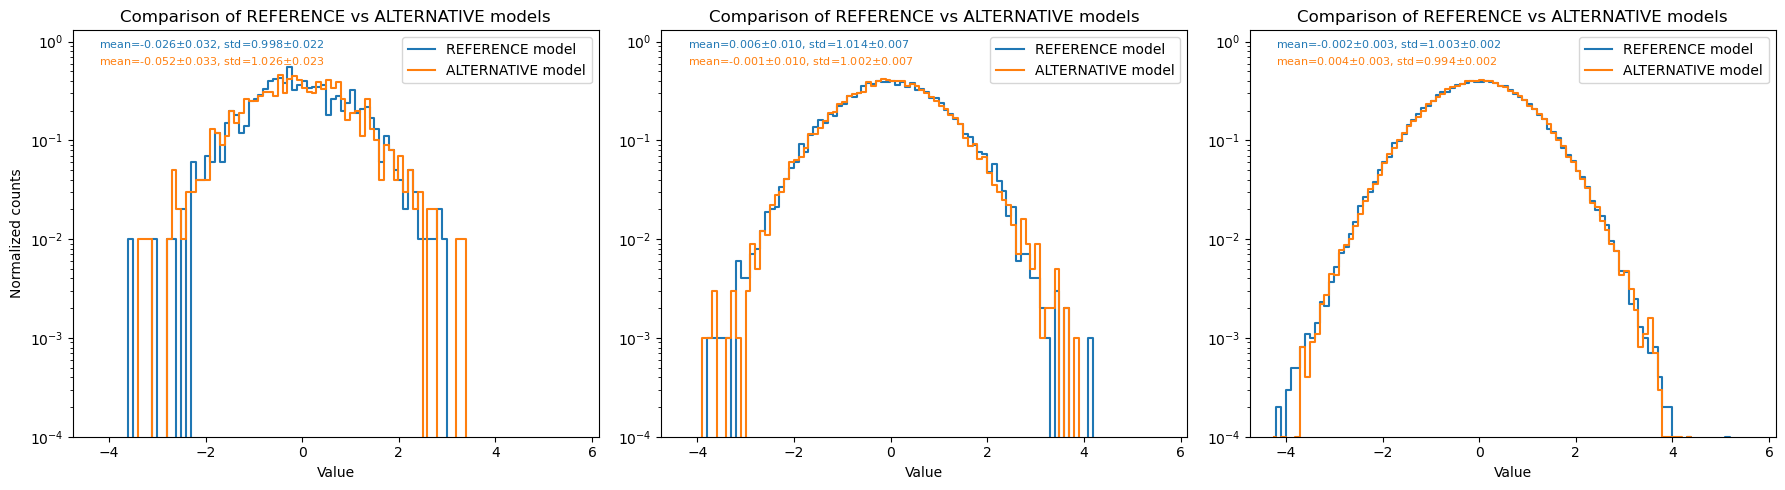

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples1 = 1000
nsamples2 = 10000
nsamples3 = 100000

# KS statistic for different values of the 'niter' parameter
sample0 = dist0.sample(nsamples1).numpy()[:,0]
sample1 = dist1.sample(nsamples1).numpy()[:,0]

sample2 = dist0.sample(nsamples2).numpy()[:,0]
sample3 = dist1.sample(nsamples2).numpy()[:,0]

sample4 = dist0.sample(nsamples3).numpy()[:,0]
sample5 = dist1.sample(nsamples3).numpy()[:,0]

# Compute the mean and standard deviation of the sample and their standard errors
mu0, deltamu0, sigma0, deltasigma0 = (np.mean(sample0), se_mean(sample0), np.std(sample0), se_std(sample0))
mu1, deltamu1, sigma1, deltasigma1 = (np.mean(sample1), se_mean(sample1), np.std(sample1), se_std(sample1))
mu2, deltamu2, sigma2, deltasigma2 = (np.mean(sample2), se_mean(sample2), np.std(sample2), se_std(sample2))
mu3, deltamu3, sigma3, deltasigma3 = (np.mean(sample3), se_mean(sample3), np.std(sample3), se_std(sample3))
mu4, deltamu4, sigma4, deltasigma4 = (np.mean(sample4), se_mean(sample4), np.std(sample4), se_std(sample4))
mu5, deltamu5, sigma5, deltasigma5 = (np.mean(sample5), se_mean(sample5), np.std(sample5), se_std(sample5))

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((sample4,sample5),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((sample4,sample5),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Create histogram for values and normalize counts to sum to 1
counts0, bin_edges = np.histogram(sample0, bins=x, density=True)
counts1, bin_edges = np.histogram(sample1, bins=x, density=True)
counts2, bin_edges = np.histogram(sample2, bins=x, density=True)
counts3, bin_edges = np.histogram(sample3, bins=x, density=True)
counts4, bin_edges = np.histogram(sample4, bins=x, density=True)
counts5, bin_edges = np.histogram(sample5, bins=x, density=True)

# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Draw the first plot
line1, = ax[0].plot(bin_centers, counts0, '-',label='REFERENCE model', drawstyle='steps-mid',)
line2, = ax[0].plot(bin_centers, counts1, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[0].text(0.05, 0.98, f'mean={mu0:.3f}$\pm${deltamu0:.3f}, std={sigma0:.3f}$\pm${deltasigma0:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=8)
ax[0].text(0.05, 0.94, f'mean={mu1:.3f}$\pm${deltamu1:.3f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line2.get_color(), fontsize=8)
# Draw the second plot
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 1.3)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Normalized counts')
ax[0].set_title('Comparison of REFERENCE vs ALTERNATIVE models')
ax[0].legend()

# Draw the second plot
line3, = ax[1].plot(bin_centers, counts2, '-',label='REFERENCE model', drawstyle='steps-mid')
line4, = ax[1].plot(bin_centers, counts3, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[1].text(0.05, 0.98, f'mean={mu2:.3f}$\pm${deltamu2:.3f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line3.get_color(), fontsize=8)
ax[1].text(0.05, 0.94, f'mean={mu3:.3f}$\pm${deltamu3:.3f}, std={sigma3:.3f}$\pm${deltasigma3:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=8)
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 1.3)
ax[1].set_xlabel('Value')
ax[1].set_title('Comparison of REFERENCE vs ALTERNATIVE models')
ax[1].legend()

# Draw the third plot
line5, = ax[2].plot(bin_centers, counts4, '-',label='REFERENCE model', drawstyle='steps-mid')
line6, = ax[2].plot(bin_centers, counts5, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[2].text(0.05, 0.98, f'mean={mu4:.3f}$\pm${deltamu4:.3f}, std={sigma4:.3f}$\pm${deltasigma4:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line5.get_color(), fontsize=8)
ax[2].text(0.05, 0.94, f'mean={mu5:.3f}$\pm${deltamu5:.3f}, std={sigma5:.3f}$\pm${deltasigma5:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line6.get_color(), fontsize=8)
ax[2].set_yscale(scale)
ax[2].set_ylim(1e-4, 1.3)
ax[2].set_xlabel('Value')
ax[2].set_title('Comparison of REFERENCE vs ALTERNATIVE models')
ax[2].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

In [ ]:
# Create a dictionary with the data
data = {
    'Sample Size': [nsamples1, nsamples1, nsamples2, nsamples2, nsamples3, nsamples3],
    'Mean': [mu0, mu1, mu2, mu3, mu4, mu5],
    'Delta Mean': [deltamu0, deltamu1, deltamu2, deltamu3, deltamu4, deltamu5],
    'Std Dev': [sigma0, sigma1, sigma2, sigma3, sigma4, sigma5],
    'Delta Std Dev': [deltasigma0, deltasigma1, deltasigma2, deltasigma3, deltasigma4, deltasigma5]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df

,Sample Size,Mean,Delta Mean,Std Dev,Delta Std Dev
0,1000,-0.026018,0.031502,0.998083,0.021617
1,1000,-0.052081,0.033274,1.025771,0.023160
2,10000,0.006175,0.010291,1.014450,0.007075
3,10000,-0.001200,0.010035,1.001745,0.007261
4,100000,-0.001960,0.003184,1.003371,0.002249
5,100000,0.004016,0.003124,0.993894,0.002228


In [ ]:
TwoSampleTestInputsReference = GMetrics.TwoSampleTestInputs(dist_1_input = dist0,
                                                            dist_2_input = dist0,
                                                            niter = 1000,
                                                            batch_size = 10000,
                                                            dtype_input = tf.float64,
                                                            seed_input = 0,
                                                            use_tf = True,
                                                            verbose = True)
print("nsamples",TwoSampleTestInputsReference.nsamples)
print("batch_size",TwoSampleTestInputsReference.batch_size)
print("niter",TwoSampleTestInputsReference.niter)
print("niter * batch_size",TwoSampleTestInputsReference.niter*TwoSampleTestInputsReference.batch_size)
print("small_sample",TwoSampleTestInputsReference.small_sample)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 10000000
batch_size 10000
niter 1000
niter * batch_size 10000000
small_sample True


In [ ]:
KSTestReference = GMetrics.KSTest(TwoSampleTestInputsReference,
                                  verbose = True)

In [ ]:
for batch_size in [1000,10000,100000,1000000]:
    for niter in [10,100,1000,10000]:
            print("\n========================================")
            KSTestReference.Inputs.batch_size = batch_size
            KSTestReference.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running TF test...")
            KSTestReference.Test_tf(max_vectorize = int(5e7 // batch_size))


niter: 10
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 10
batch_size = 1000
Running compute_paired
KS tests calculation completed in 2.5112912200274877 seconds.

niter: 100
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 1000
Running compute_paired
KS tests calculation completed in 1.342529938032385 seconds.

niter: 1000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 1000
batch_size = 1000
Running compute_paired
KS tests calculation completed in 1.7752477650064975 seconds.

niter: 10000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 10000
batch_size = 1000
Running compute_paired
KS tests calculatio

In [ ]:
for batch_size in [10000000]:
    for niter in [10,100,1000]:
            print("\n========================================")
            KSTestReference.Inputs.batch_size = batch_size
            KSTestReference.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running TF test...")
            KSTestReference.Test_tf(max_vectorize = int(5e7 // batch_size))


niter: 10
batch_size: 10000000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 10
batch_size = 10000000
Running compute_paired
nchunks = 2
Iterating from 0 to 5 out of 10 .
Iterating from 5 to 10 out of 10 .
KS tests calculation completed in 9.284600870974828 seconds.

niter: 100
batch_size: 10000000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 10000000
Running compute_paired
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 20
Iterating from 0 to 5 out of 100 .
Iterating from 5 to 10 out of 100 .
Iterating from 10 to 15 out of 100 .
Iterating from 15 to 20 out of 100 .
Iterating from 20 to 25 out of 100 .
Iterating from 25 to 30 out of 100 .
Iterating from 30 to 35 out of 100 .
I

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
df = pd.DataFrame(KSTestReference.Results.get_results_as_dataframe(sort_kwargs = {"by": ["batch_size","niter"], "ascending": [True,True]}))
display(df)

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-27T12:24:01.635163,KS Test_tf,"((tf.Tensor(0.02899998426437378, shape=(), dty...",True,True,1,10,1000,<dtype: 'float64'>,True,10,1000,2.511291,tensorflow
0,2023-07-27T12:24:03.199608,KS Test_tf,"((tf.Tensor(0.03200000524520874, shape=(), dty...",True,True,1,100,1000,<dtype: 'float64'>,True,100,1000,1.34253,tensorflow
0,2023-07-27T12:24:05.199705,KS Test_tf,"((tf.Tensor(0.05000004172325134, shape=(), dty...",True,True,1,1000,1000,<dtype: 'float64'>,True,1000,1000,1.775248,tensorflow
0,2023-07-27T12:24:10.525089,KS Test_tf,"((tf.Tensor(0.04600003361701965, shape=(), dty...",True,True,1,10000,1000,<dtype: 'float64'>,True,10000,1000,5.011985,tensorflow
0,2023-07-27T12:24:12.220546,KS Test_tf,"((tf.Tensor(0.014599978923797607, shape=(), dt...",True,True,1,10,10000,<dtype: 'float64'>,True,10,10000,1.377282,tensorflow
0,2023-07-27T12:24:14.165326,KS Test_tf,"((tf.Tensor(0.010100007057189941, shape=(), dt...",True,True,1,100,10000,<dtype: 'float64'>,True,100,10000,1.734965,tensorflow
0,2023-07-27T12:24:16.275418,KS Test_tf,"((tf.Tensor(0.009000003337860107, shape=(), dt...",True,True,1,1000,10000,<dtype: 'float64'>,True,1000,10000,1.895659,tensorflow
0,2023-07-27T12:24:22.497033,KS Test_tf,"((tf.Tensor(0.013099998235702515, shape=(), dt...",True,True,1,10000,10000,<dtype: 'float64'>,True,10000,10000,5.950627,tensorflow
0,2023-07-27T12:24:24.274276,KS Test_tf,"((tf.Tensor(0.003939986228942871, shape=(), dt...",True,True,1,10,100000,<dtype: 'float64'>,True,10,100000,1.526644,tensorflow
0,2023-07-27T12:24:26.020858,KS Test_tf,"((tf.Tensor(0.0019699931144714355, shape=(), d...",True,True,1,100,100000,<dtype: 'float64'>,True,100,100000,1.539193,tensorflow


In [ ]:
# Initialize an empty list to store the rows of the table
table = []
df = pd.DataFrame(KSTestReference.Results.get_results_as_dataframe(sort_kwargs = {"by": ["batch_size","niter"], "ascending": [True,True]}))

for nsamples in np.unique(df["batch_size"]).tolist():
    ns = nsamples**2 / (2*nsamples)
    df_reduced = pd.DataFrame(df[(df["batch_size"]==nsamples)])
    max_niter = df_reduced['niter'].max()
    all_max_value_rows = df_reduced[df_reduced['niter'] == max_niter]
    ts_dist = all_max_value_rows["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
    ts_mean = np.mean(ts_dist)
    ts_std = np.std(ts_dist)
    # Append the row to the table
    table.append([nsamples, ns, max_niter, ts_mean, ts_std])

# Define the table headers
headers = ["nsamples", "ns", "max_niter", "ts_mean", "ts_std"]

# Create a DataFrame from the table
df_table = pd.DataFrame(table, columns=headers)

# Display the DataFrame
print(df_table)

   nsamples         ns  max_niter   ts_mean    ts_std
0      1000      500.0      10000  0.860104  0.261293
1     10000     5000.0      10000  0.864308  0.258598
2    100000    50000.0      10000  0.867230  0.260474
3   1000000   500000.0      10000  0.873553  0.263511
4  10000000  5000000.0       1000  0.875772  0.270266


In [ ]:
TwoSampleTestInputsAlternative = GMetrics.TwoSampleTestInputs(dist_1_input = dist0,
                                                              dist_2_input = dist1,
                                                              niter = 1000,
                                                              batch_size = 10000,
                                                              dtype_input = tf.float64,
                                                              seed_input = 0,
                                                              use_tf = True,
                                                              verbose = True)
print("nsamples",TwoSampleTestInputsAlternative.nsamples)
print("batch_size",TwoSampleTestInputsAlternative.batch_size)
print("niter",TwoSampleTestInputsAlternative.niter)
print("niter * batch_size",TwoSampleTestInputsAlternative.niter*TwoSampleTestInputsAlternative.batch_size)
print("small_sample",TwoSampleTestInputsAlternative.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


nsamples 10000000
batch_size 10000
niter 1000
niter * batch_size 10000000
small_sample True


In [ ]:
KSTestAlternative = GMetrics.KSTest(TwoSampleTestInputsAlternative,
                                    verbose = True)

In [ ]:
for batch_size in [1000,10000,100000,1000000]:
    for niter in [10,100,1000,10000]:
            print("\n========================================")
            KSTestAlternative.Inputs.batch_size = batch_size
            KSTestAlternative.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running TF test...")
            KSTestAlternative.Test_tf(max_vectorize = int(5e7 // batch_size))


niter: 10
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 10
batch_size = 1000
Running compute_paired
KS tests calculation completed in 1.6285044200485572 seconds.

niter: 100
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 1000
Running compute_paired
KS tests calculation completed in 1.3063008369645104 seconds.

niter: 1000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 1000
batch_size = 1000
Running compute_paired
KS tests calculation completed in 1.6668850060086697 seconds.

niter: 10000
batch_size: 1000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 10000
batch_size = 1000
Running compute_paired
KS tests calculati

In [ ]:
for batch_size in [10000000]:
    for niter in [10,100]:
            print("\n========================================")
            KSTestAlternative.Inputs.batch_size = batch_size
            KSTestAlternative.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running TF test...")
            KSTestAlternative.Test_tf(max_vectorize = int(5e7 // batch_size))


niter: 10
batch_size: 10000000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 10
batch_size = 10000000
Running compute_paired
nchunks = 2
Iterating from 0 to 5 out of 10 .
Iterating from 5 to 10 out of 10 .
KS tests calculation completed in 9.330301222973503 seconds.

niter: 100
batch_size: 10000000
----------------------------------------
Running TF test...
Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 10000000
Running compute_paired
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 20
Iterating from 0 to 5 out of 100 .
Iterating from 5 to 10 out of 100 .
Iterating from 10 to 15 out of 100 .
Iterating from 15 to 20 out of 100 .
Iterating from 20 to 25 out of 100 .
Iterating from 25 to 30 out of 100 .
Iterating from 30 to 35 out of 100 .
I

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
df = pd.DataFrame(KSTestAlternative.Results.get_results_as_dataframe(sort_kwargs = {"by": ["batch_size","niter"], "ascending": [True,True]}))
display(df)

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-27T12:30:22.845396,KS Test_tf,"((tf.Tensor(0.030000001192092896, shape=(), dt...",True,True,1,10,1000,<dtype: 'float64'>,True,10,1000,1.628504,tensorflow
0,2023-07-27T12:30:24.373057,KS Test_tf,"((tf.Tensor(0.03600001335144043, shape=(), dty...",True,True,1,100,1000,<dtype: 'float64'>,True,100,1000,1.306301,tensorflow
0,2023-07-27T12:30:26.247628,KS Test_tf,"((tf.Tensor(0.05200004577636719, shape=(), dty...",True,True,1,1000,1000,<dtype: 'float64'>,True,1000,1000,1.666885,tensorflow
0,2023-07-27T12:30:30.859067,KS Test_tf,"((tf.Tensor(0.058000028133392334, shape=(), dt...",True,True,1,10000,1000,<dtype: 'float64'>,True,10000,1000,4.408821,tensorflow
0,2023-07-27T12:30:32.401997,KS Test_tf,"((tf.Tensor(0.016200006008148193, shape=(), dt...",True,True,1,10,10000,<dtype: 'float64'>,True,10,10000,1.281564,tensorflow
0,2023-07-27T12:30:33.946411,KS Test_tf,"((tf.Tensor(0.009900003671646118, shape=(), dt...",True,True,1,100,10000,<dtype: 'float64'>,True,100,10000,1.334882,tensorflow
0,2023-07-27T12:30:35.986925,KS Test_tf,"((tf.Tensor(0.01639997959136963, shape=(), dty...",True,True,1,1000,10000,<dtype: 'float64'>,True,1000,10000,1.831919,tensorflow
0,2023-07-27T12:30:42.053137,KS Test_tf,"((tf.Tensor(0.013000011444091797, shape=(), dt...",True,True,1,10000,10000,<dtype: 'float64'>,True,10000,10000,5.782634,tensorflow
0,2023-07-27T12:30:43.631383,KS Test_tf,"((tf.Tensor(0.002710014581680298, shape=(), dt...",True,True,1,10,100000,<dtype: 'float64'>,True,10,100000,1.326594,tensorflow
0,2023-07-27T12:30:45.740975,KS Test_tf,"((tf.Tensor(0.005129992961883545, shape=(), dt...",True,True,1,100,100000,<dtype: 'float64'>,True,100,100000,1.89635,tensorflow


In [ ]:
# Initialize an empty list to store the rows of the table
table = []
df = pd.DataFrame(KSTestAlternative.Results.get_results_as_dataframe(sort_kwargs = {"by": ["batch_size","niter"], "ascending": [True,True]}))

for nsamples in np.unique(df["batch_size"]).tolist():
    ns = nsamples**2 / (2*nsamples)
    df_reduced = pd.DataFrame(df[(df["batch_size"]==nsamples)])
    max_niter = df_reduced['niter'].max()
    all_max_value_rows = df_reduced[df_reduced['niter'] == max_niter]
    ts_dist = all_max_value_rows["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
    ts_mean = np.mean(ts_dist)
    ts_std = np.std(ts_dist)
    # Append the row to the table
    table.append([nsamples, ns, max_niter, ts_mean, ts_std])

# Define the table headers
headers = ["nsamples", "ns", "max_niter", "ts_mean", "ts_std"]

# Create a DataFrame from the table
df_table = pd.DataFrame(table, columns=headers)

# Display the DataFrame
print(df_table)

   nsamples         ns  max_niter   ts_mean    ts_std
0      1000      500.0      10000  0.861886  0.260198
1     10000     5000.0      10000  0.875108  0.263159
2    100000    50000.0      10000  0.922985  0.284122
3   1000000   500000.0      10000  1.348353  0.373439
4  10000000  5000000.0        100  3.242096  0.429651


#### Comparing KS-1K hypotheses

##### NULL hypothesis

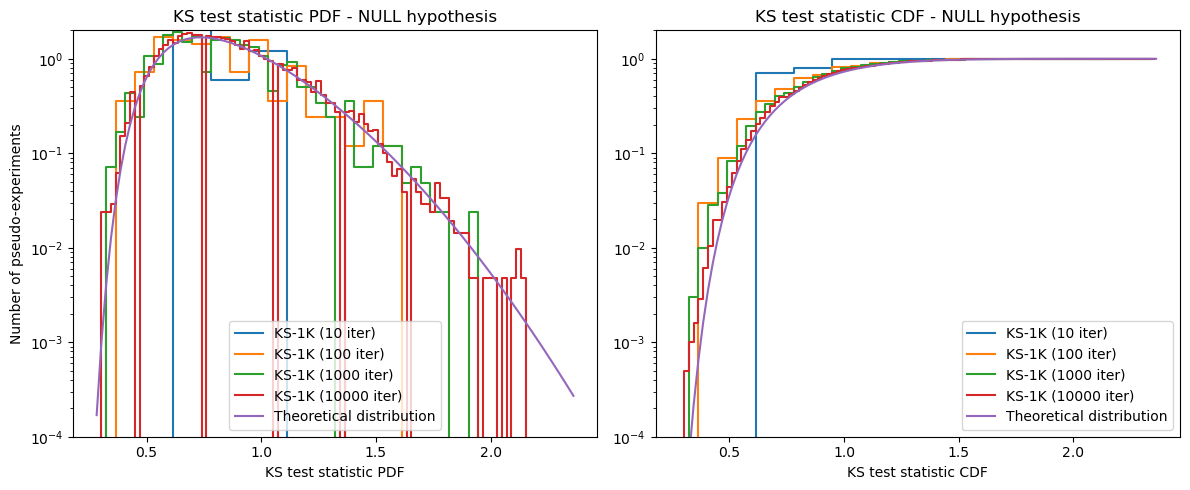

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()


##### ALTERNATIVE hypothesis

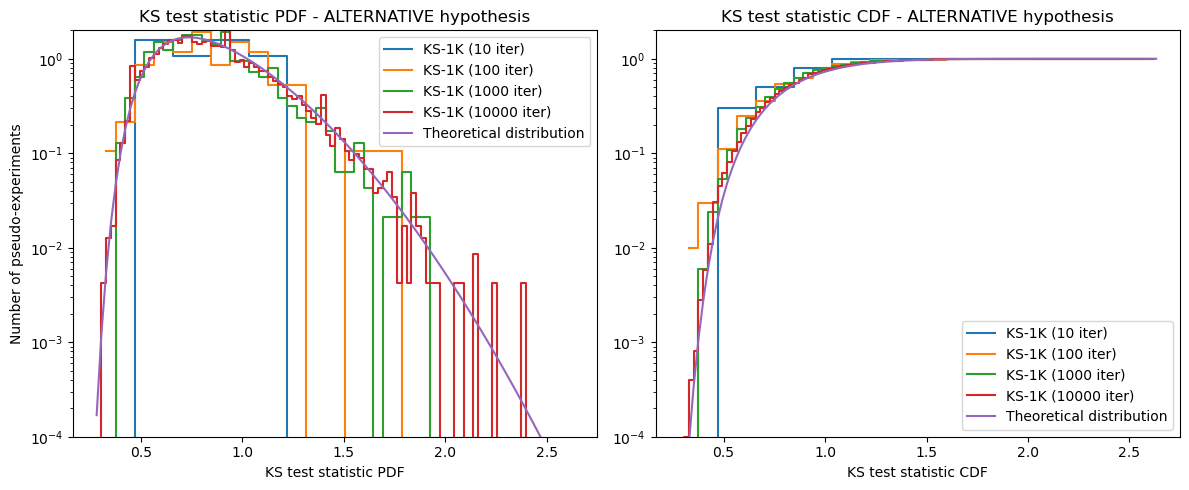

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - ALTERNATIVE hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - ALTERNATIVE hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

##### NULL vs ALTERNATIVE hypotheses

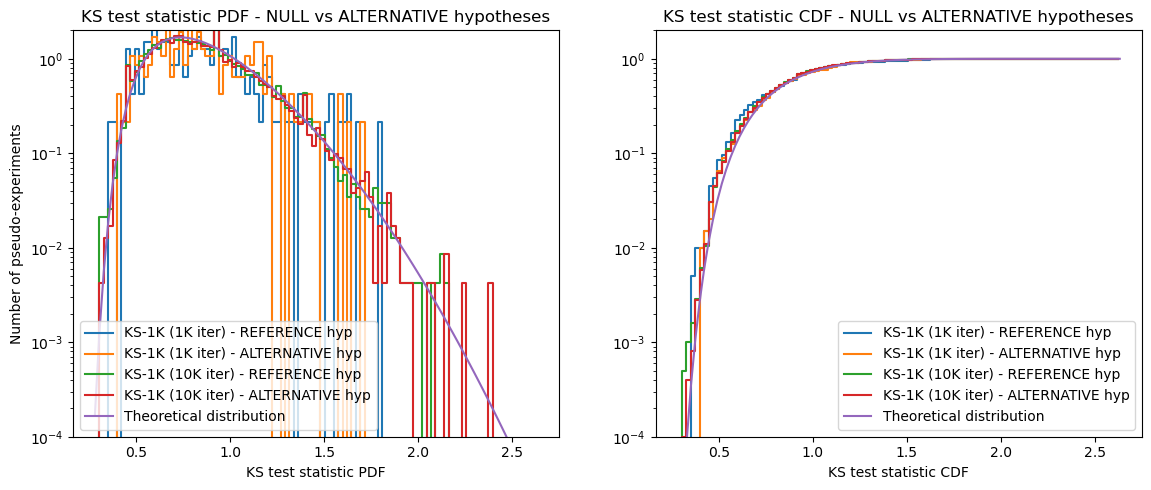

Mean value of the KS test statistic under ALTERNATIVE hypothesis: 0.8618858618825183
One-sided p-value: 0.4364
Two-sided p-value: 0.4364


In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1[::5], bins=x, density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x, density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3[::5], bins=x, density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL vs ALTERNATIVE hypotheses')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL vs ALTERNATIVE hypotheses')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

null_dist = np.array(ks_stats_2)
observed_stat = df_table[df_table["nsamples"] == nsamples]["ts_mean"].values[0]
# For a one-sided test where larger values are more extreme
p_value_one_sided = np.sum(null_dist >= observed_stat) / len(null_dist)

# For a two-sided test where both larger and smaller values are more extreme
p_value_two_sided = np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist)

print("Mean value of the KS test statistic under ALTERNATIVE hypothesis:", observed_stat)
print("One-sided p-value:", p_value_one_sided)
print("Two-sided p-value:", p_value_two_sided)

#### Comparing KS-10K hypotheses

##### NULL hypothesis

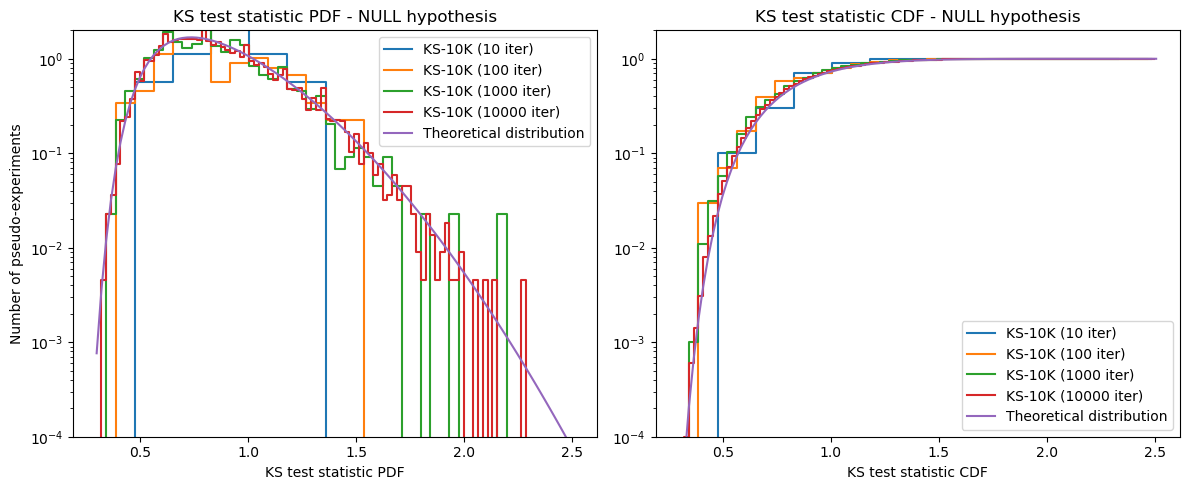

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 10000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()


##### ALTERNATIVE hypothesis

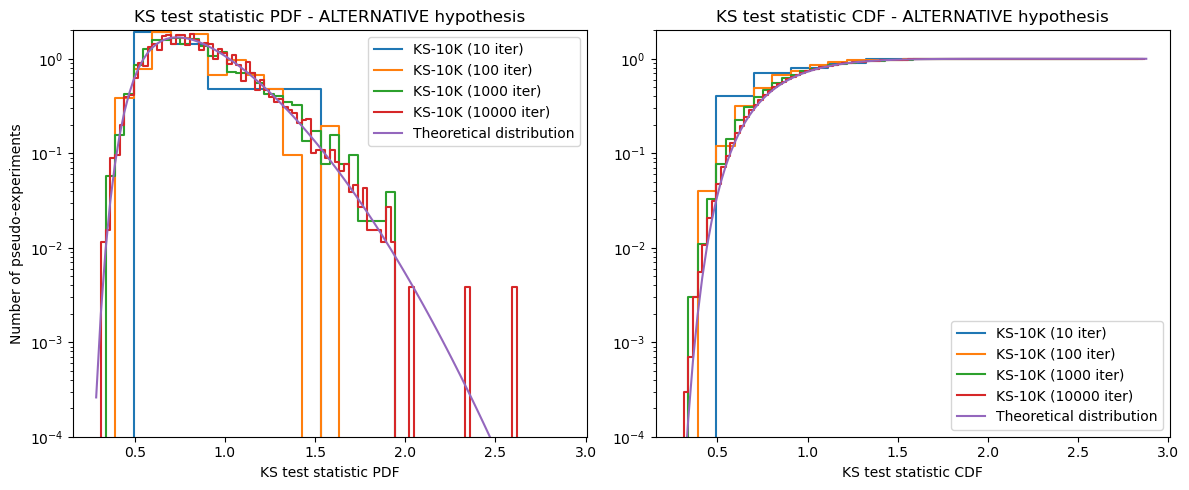

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 10000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - ALTERNATIVE hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - ALTERNATIVE hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

##### NULL vs ALTERNATIVE hypotheses

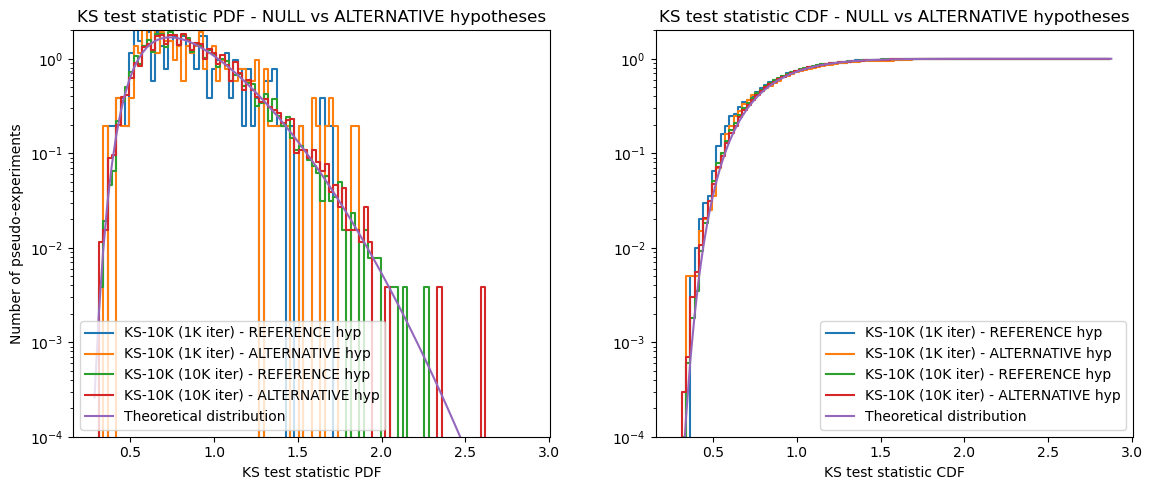

Mean value of the KS test statistic under ALTERNATIVE hypothesis: 0.8751079353463916
One-sided p-value: 0.4204
Two-sided p-value: 0.4204


In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 10000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1[::5], bins=x, density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x, density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3[::5], bins=x, density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL vs ALTERNATIVE hypotheses')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL vs ALTERNATIVE hypotheses')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

null_dist = np.array(ks_stats_2)
observed_stat = df_table[df_table["nsamples"] == nsamples]["ts_mean"].values[0]
# For a one-sided test where larger values are more extreme
p_value_one_sided = np.sum(null_dist >= observed_stat) / len(null_dist)

# For a two-sided test where both larger and smaller values are more extreme
p_value_two_sided = np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist)

print("Mean value of the KS test statistic under ALTERNATIVE hypothesis:", observed_stat)
print("One-sided p-value:", p_value_one_sided)
print("Two-sided p-value:", p_value_two_sided)

#### Comparing KS-100K hypotheses

##### NULL hypothesis

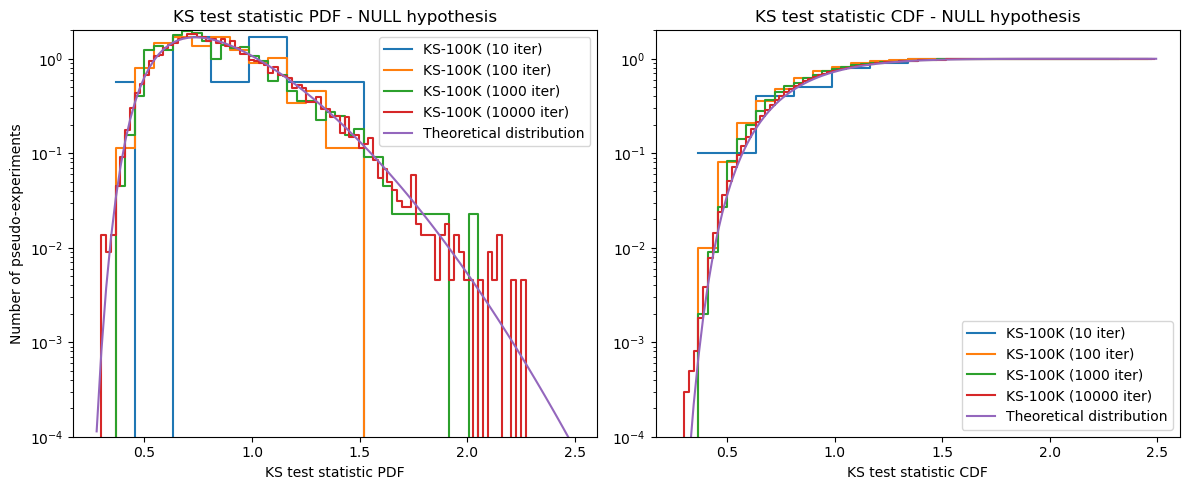

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 100000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()


##### ALTERNATIVE hypothesis

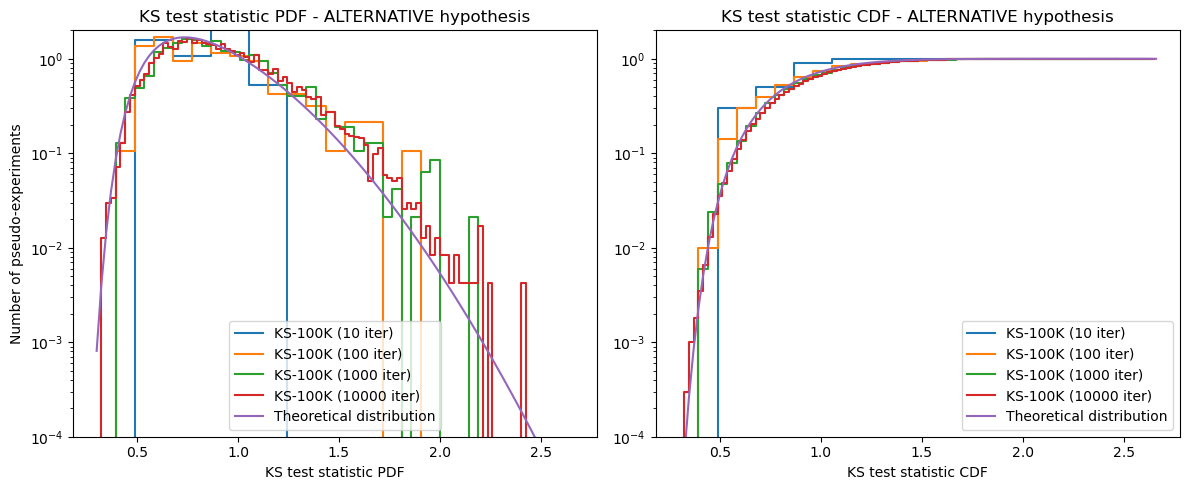

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 100000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - ALTERNATIVE hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - ALTERNATIVE hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

##### NULL vs ALTERNATIVE hypotheses

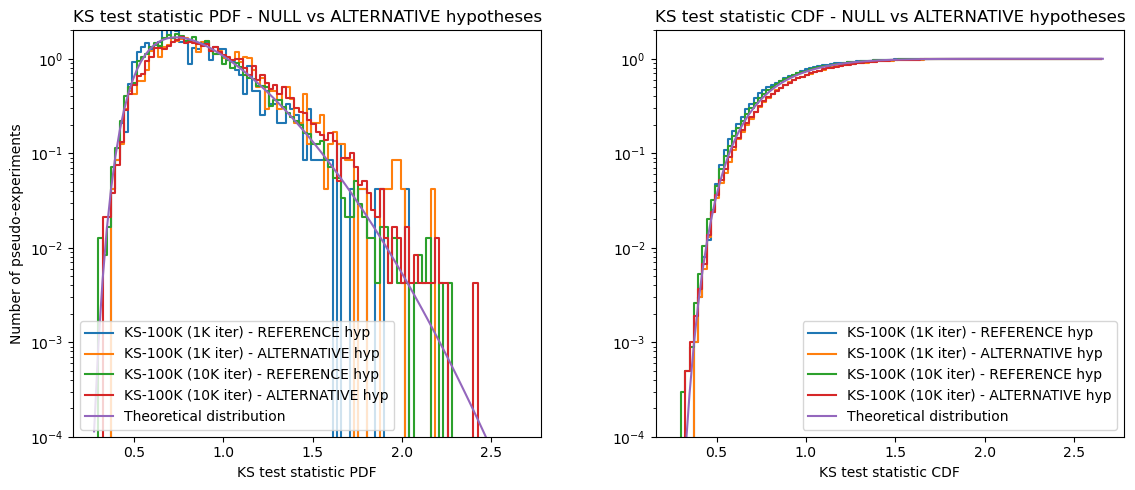

Mean value of the KS test statistic under ALTERNATIVE hypothesis: 0.9229853460369021
One-sided p-value: 0.3531
Two-sided p-value: 0.3531


In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 100000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x, density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x, density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x, density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL vs ALTERNATIVE hypotheses')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL vs ALTERNATIVE hypotheses')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

null_dist = np.array(ks_stats_2)
observed_stat = df_table[df_table["nsamples"] == nsamples]["ts_mean"].values[0]
# For a one-sided test where larger values are more extreme
p_value_one_sided = np.sum(null_dist >= observed_stat) / len(null_dist)

# For a two-sided test where both larger and smaller values are more extreme
p_value_two_sided = np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist)

print("Mean value of the KS test statistic under ALTERNATIVE hypothesis:", observed_stat)
print("One-sided p-value:", p_value_one_sided)
print("Two-sided p-value:", p_value_two_sided)

#### Comparing KS-1M hypotheses

##### NULL hypothesis

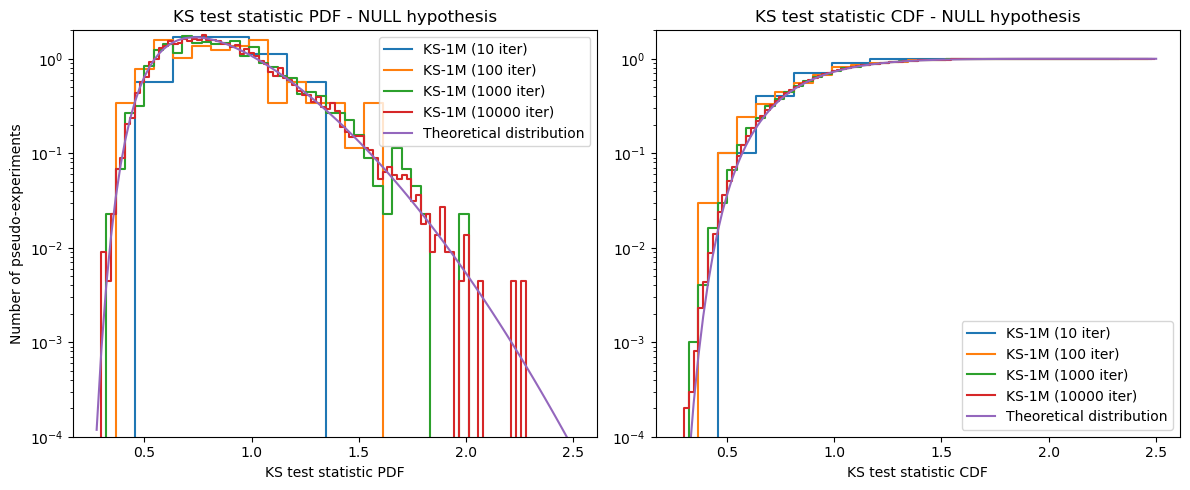

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()


##### ALTERNATIVE hypothesis

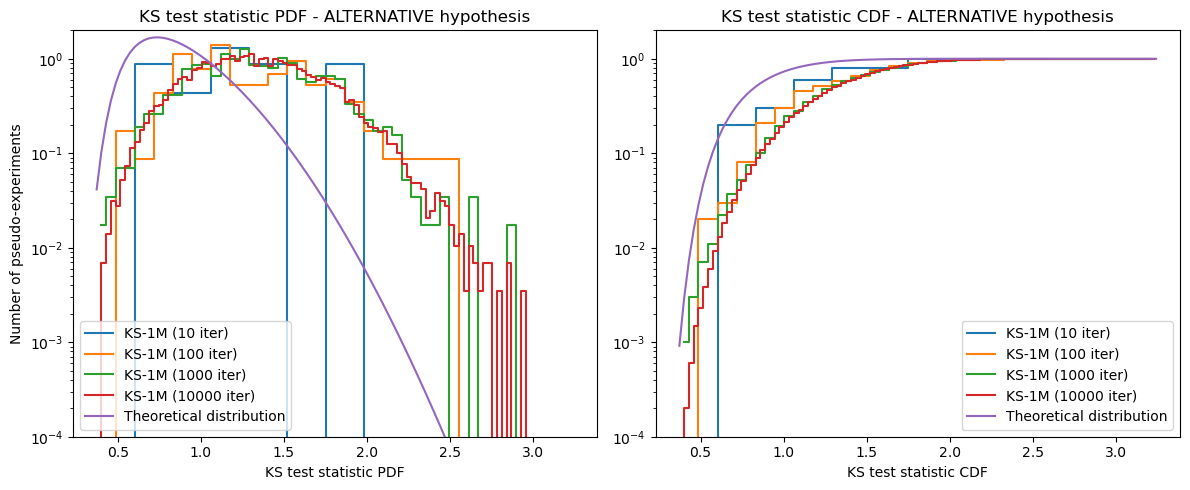

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - ALTERNATIVE hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000000)+'M ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - ALTERNATIVE hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

##### NULL vs ALTERNATIVE hypotheses

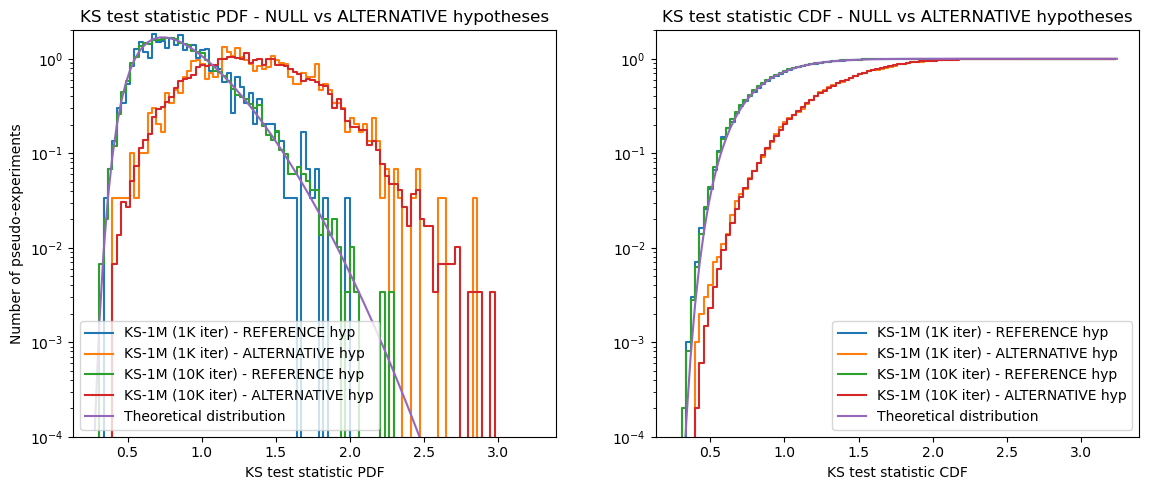

Mean value of the KS test statistic under ALTERNATIVE hypothesis: 1.3483527816450123
One-sided p-value: 0.0578
Two-sided p-value: 0.0578


In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0].numpy()[:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x, density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x, density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x, density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000000)+'M (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000000)+'M (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000000)+'M (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000000)+'M (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL vs ALTERNATIVE hypotheses')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000000)+'M (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000000)+'M (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000000)+'M (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000000)+'M (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL vs ALTERNATIVE hypotheses')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

null_dist = np.array(ks_stats_2)
observed_stat = df_table[df_table["nsamples"] == nsamples]["ts_mean"].values[0]
# For a one-sided test where larger values are more extreme
p_value_one_sided = np.sum(null_dist >= observed_stat) / len(null_dist)

# For a two-sided test where both larger and smaller values are more extreme
p_value_two_sided = np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist)

print("Mean value of the KS test statistic under ALTERNATIVE hypothesis:", observed_stat)
print("One-sided p-value:", p_value_one_sided)
print("Two-sided p-value:", p_value_two_sided)

In [ ]:
ks_2samp(ks_stats_2,ks_stats_4)

KstestResult(statistic=0.5504, pvalue=0.0, statistic_location=1.0705510256009638, statistic_sign=1)

### 1D Likelihood-ratio

In [ ]:
ndims = 1
seed = 0
epsilon = 0.005
loc0 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
scale0 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
loc1 = np.array(np.random.uniform(-epsilon,epsilon,ndims),dtype=np.float64)
scale1 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
dist0 = tfp.distributions.Normal(loc=loc0, scale=scale0)
dist1 = tfp.distributions.Normal(loc=loc1, scale=scale1)
print(dist0.dtype, dist1.dtype)

<dtype: 'float64'> <dtype: 'float64'>


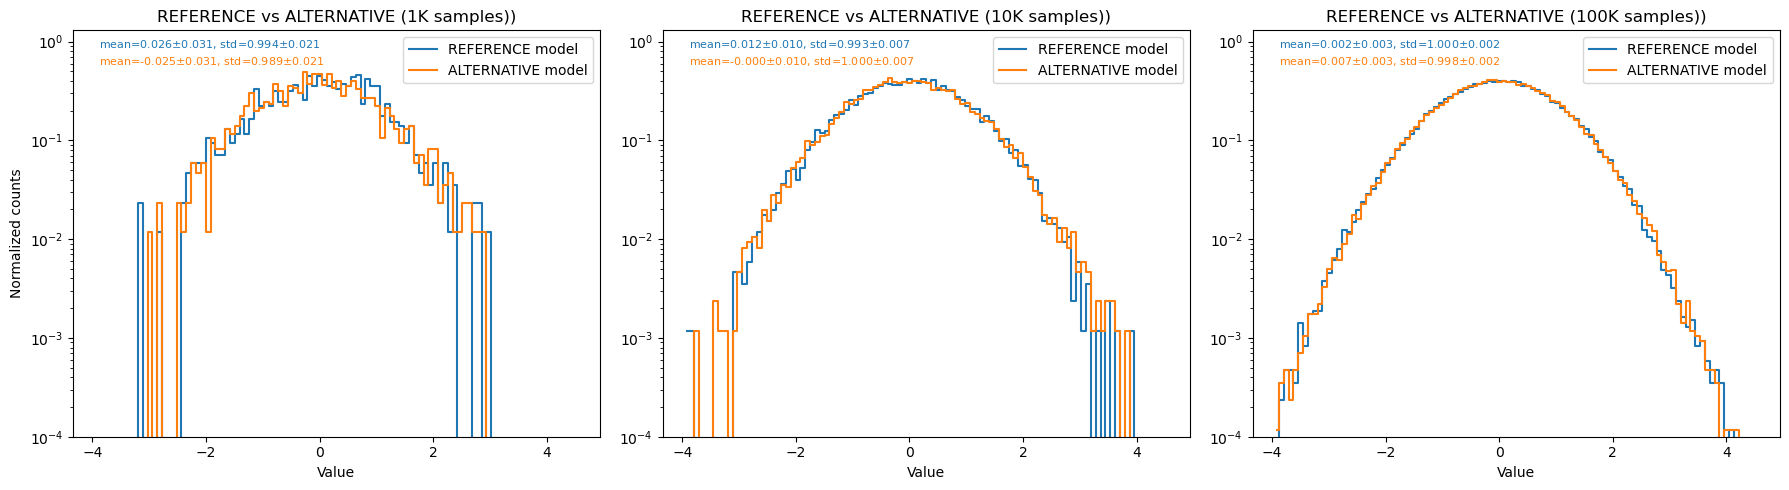

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples1 = 1000
nsamples2 = 10000
nsamples3 = 100000

# KS statistic for different values of the 'niter' parameter
sample0 = dist0.sample(nsamples1).numpy()[:,0]
sample1 = dist1.sample(nsamples1).numpy()[:,0]

sample2 = dist0.sample(nsamples2).numpy()[:,0]
sample3 = dist1.sample(nsamples2).numpy()[:,0]

sample4 = dist0.sample(nsamples3).numpy()[:,0]
sample5 = dist1.sample(nsamples3).numpy()[:,0]

# Compute the mean and standard deviation of the sample and their standard errors
mu0, deltamu0, sigma0, deltasigma0 = (np.mean(sample0), se_mean(sample0), np.std(sample0), se_std(sample0))
mu1, deltamu1, sigma1, deltasigma1 = (np.mean(sample1), se_mean(sample1), np.std(sample1), se_std(sample1))
mu2, deltamu2, sigma2, deltasigma2 = (np.mean(sample2), se_mean(sample2), np.std(sample2), se_std(sample2))
mu3, deltamu3, sigma3, deltasigma3 = (np.mean(sample3), se_mean(sample3), np.std(sample3), se_std(sample3))
mu4, deltamu4, sigma4, deltasigma4 = (np.mean(sample4), se_mean(sample4), np.std(sample4), se_std(sample4))
mu5, deltamu5, sigma5, deltasigma5 = (np.mean(sample5), se_mean(sample5), np.std(sample5), se_std(sample5))

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((sample4,sample5),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((sample4,sample5),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Create histogram for values and normalize counts to sum to 1
counts0, bin_edges = np.histogram(sample0, bins=x, density=True)
counts1, bin_edges = np.histogram(sample1, bins=x, density=True)
counts2, bin_edges = np.histogram(sample2, bins=x, density=True)
counts3, bin_edges = np.histogram(sample3, bins=x, density=True)
counts4, bin_edges = np.histogram(sample4, bins=x, density=True)
counts5, bin_edges = np.histogram(sample5, bins=x, density=True)

# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Draw the first plot
line1, = ax[0].plot(bin_centers, counts0, '-',label='REFERENCE model', drawstyle='steps-mid',)
line2, = ax[0].plot(bin_centers, counts1, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[0].text(0.05, 0.98, f'mean={mu0:.3f}$\pm${deltamu0:.3f}, std={sigma0:.3f}$\pm${deltasigma0:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=8)
ax[0].text(0.05, 0.94, f'mean={mu1:.3f}$\pm${deltamu1:.3f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line2.get_color(), fontsize=8)
# Draw the second plot
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 1.3)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Normalized counts')
ax[0].set_title('REFERENCE vs ALTERNATIVE (1K samples))')
ax[0].legend()

# Draw the second plot
line3, = ax[1].plot(bin_centers, counts2, '-',label='REFERENCE model', drawstyle='steps-mid')
line4, = ax[1].plot(bin_centers, counts3, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[1].text(0.05, 0.98, f'mean={mu2:.3f}$\pm${deltamu2:.3f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line3.get_color(), fontsize=8)
ax[1].text(0.05, 0.94, f'mean={mu3:.3f}$\pm${deltamu3:.3f}, std={sigma3:.3f}$\pm${deltasigma3:.3f}', transform=ax[1].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=8)
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 1.3)
ax[1].set_xlabel('Value')
ax[1].set_title('REFERENCE vs ALTERNATIVE (10K samples))')
ax[1].legend()

# Draw the third plot
line5, = ax[2].plot(bin_centers, counts4, '-',label='REFERENCE model', drawstyle='steps-mid')
line6, = ax[2].plot(bin_centers, counts5, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[2].text(0.05, 0.98, f'mean={mu4:.3f}$\pm${deltamu4:.3f}, std={sigma4:.3f}$\pm${deltasigma4:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line5.get_color(), fontsize=8)
ax[2].text(0.05, 0.94, f'mean={mu5:.3f}$\pm${deltamu5:.3f}, std={sigma5:.3f}$\pm${deltasigma5:.3f}', transform=ax[2].transAxes, verticalalignment='top', color=line6.get_color(), fontsize=8)
ax[2].set_yscale(scale)
ax[2].set_ylim(1e-4, 1.3)
ax[2].set_xlabel('Value')
ax[2].set_title('REFERENCE vs ALTERNATIVE (100K samples))')
ax[2].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

In [ ]:
# Create a dictionary with the data
data = {
    'Sample Size': [nsamples1, nsamples1, nsamples2, nsamples2, nsamples3, nsamples3],
    'Mean': [mu0, mu1, mu2, mu3, mu4, mu5],
    'Delta Mean': [deltamu0, deltamu1, deltamu2, deltamu3, deltamu4, deltamu5],
    'Std Dev': [sigma0, sigma1, sigma2, sigma3, sigma4, sigma5],
    'Delta Std Dev': [deltasigma0, deltasigma1, deltasigma2, deltasigma3, deltasigma4, deltasigma5]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df

,Sample Size,Mean,Delta Mean,Std Dev,Delta Std Dev
0,1000,0.025721,0.031257,0.994202,0.021497
1,1000,-0.025462,0.030943,0.989189,0.021474
2,10000,0.011826,0.009861,0.993045,0.006947
3,10000,-0.000292,0.009999,0.999973,0.007149
4,100000,0.002018,0.003161,0.999844,0.002233
5,100000,0.007476,0.003149,0.997832,0.002234


#### NULL hypothesis

In [ ]:
ts_dist_null = {}
ts_dist_alt = {}
for nsamples in [100,1000,10000,100000,1000000,10000000]:

    print("\nNumber of samples:", nsamples)
    # Here I assume that the NULL hypothesis is true by always sampling from the reference distribution (both sample_1 and sample_2 come from sampling dist0)
    # This gives the distribution of the test statistic under the NULL hypothesis

    ts_dist_null[nsamples] = {}
    ts_dist_alt[nsamples] = {}
    
    for niter in [10, 100, 1000, 10000]:
        
        print("Number of pseudo-experiments:", niter)
        lik_ref_dist = []
        lik_alt_dist = []
        ts_dist_null[nsamples][niter] = []
        for i in range(niter):
            # Generate samples assuming that the NULL hypothesis is true
            sample_1 = dist0.sample(nsamples)
            sample_2 = dist0.sample(nsamples)
            # Computing the log-likelihood of the samples under the REFERENCE distribution
            lik_ref_dist.append(tf.reduce_sum(dist0.log_prob(sample_1)).numpy()+tf.reduce_sum(dist0.log_prob(sample_2)).numpy())
            # Computing the log-likelihood of the samples under the ALTERNATIVE distribution
            lik_alt_dist.append(tf.reduce_sum(dist0.log_prob(sample_1)).numpy()+tf.reduce_sum(dist1.log_prob(sample_2)).numpy())
            # Computing the test statistic (log-likehood ratio)
            ts_dist_null[nsamples][niter].append(2*(lik_alt_dist[i]-lik_ref_dist[i]))
        ts_dist_null[nsamples][niter] = np.array(ts_dist_null[nsamples][niter])

        # Here I assume that the samples come from the two different distributions (sample_1 comes from sampling dist0 and sample_2 comes from sampling dist1)
        # This gives the distribution of the test statistic under the ALTERNATIVE hypothesis

        lik_ref_dist = []
        lik_alt_dist = []
        ts_dist_alt[nsamples][niter] = []
        for i in range(niter):
            # Generate samples assuming that the ALTERNATIVE hypothesis is true
            sample_1 = dist0.sample(nsamples)
            sample_2 = dist1.sample(nsamples)
            # Computing the log-likelihood of the samples under the REFERENCE distribution
            lik_ref_dist.append(tf.reduce_sum(dist0.log_prob(sample_1)).numpy()+tf.reduce_sum(dist0.log_prob(sample_2)).numpy())
            # Computing the log-likelihood of the samples under the ALTERNATIVE distribution
            lik_alt_dist.append(tf.reduce_sum(dist0.log_prob(sample_1)).numpy()+tf.reduce_sum(dist1.log_prob(sample_2)).numpy())
            # Computing the test statistic (log-likehood ratio)
            ts_dist_alt[nsamples][niter].append(2*(lik_alt_dist[i]-lik_ref_dist[i]))
        ts_dist_alt[nsamples][niter] = np.array(ts_dist_alt[nsamples][niter])

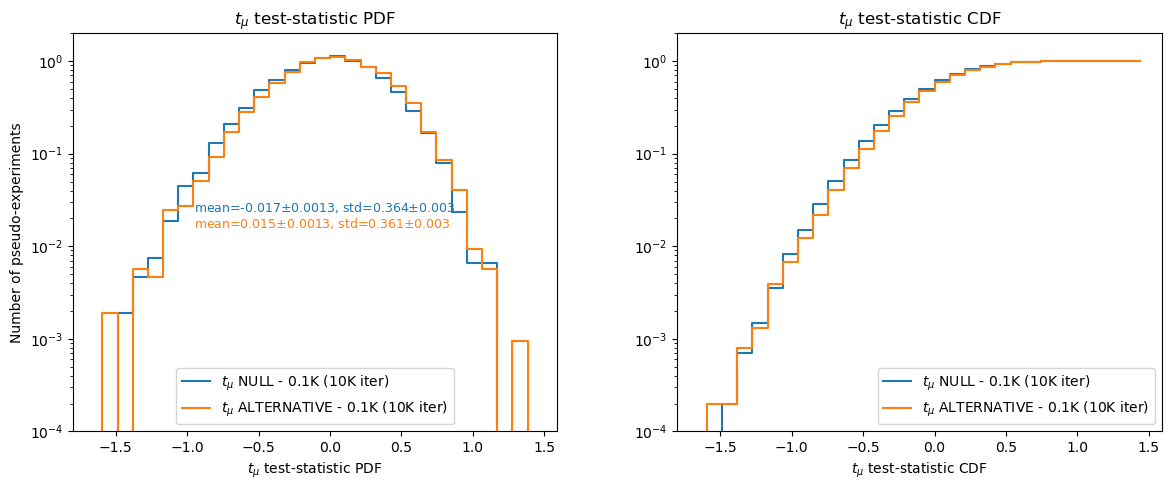

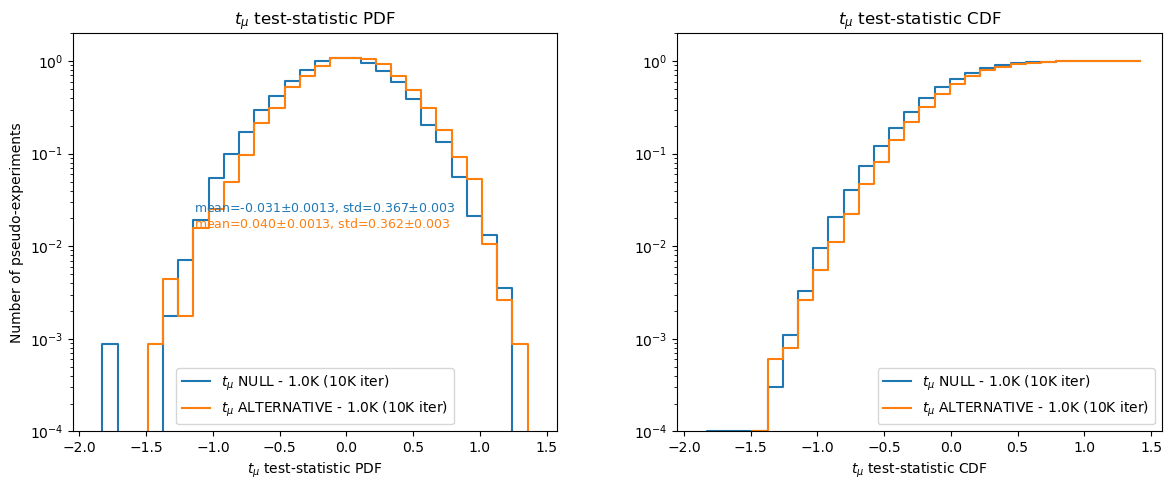

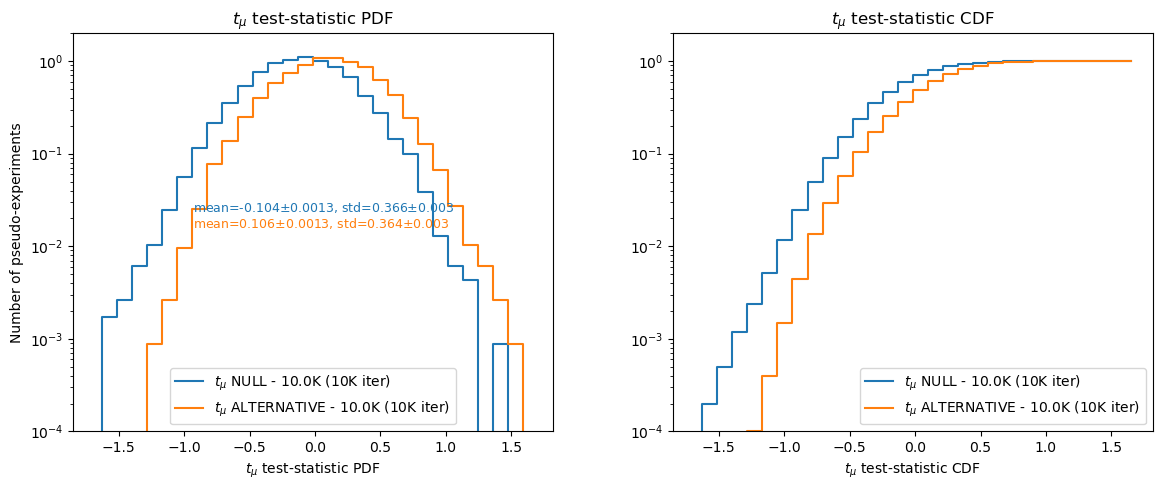

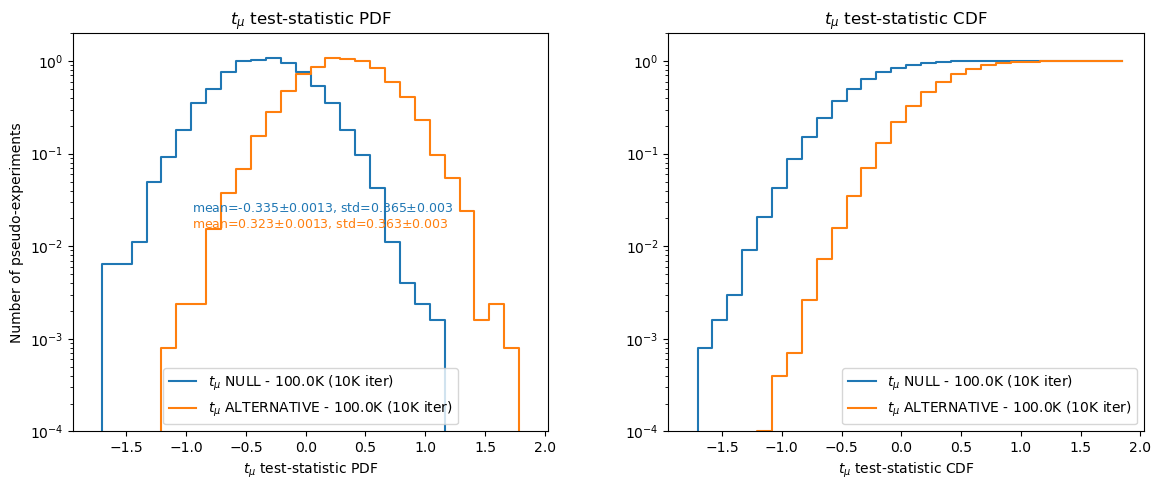

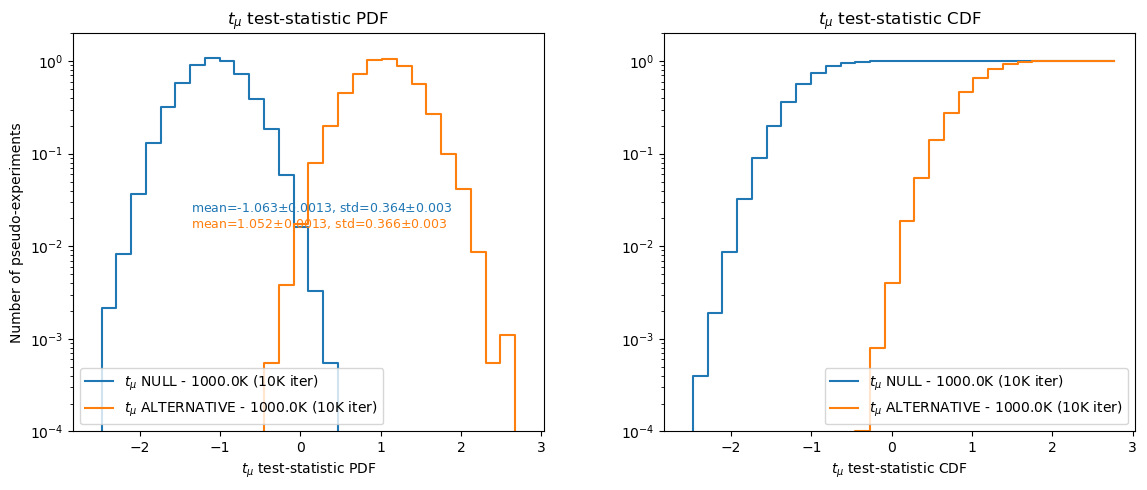

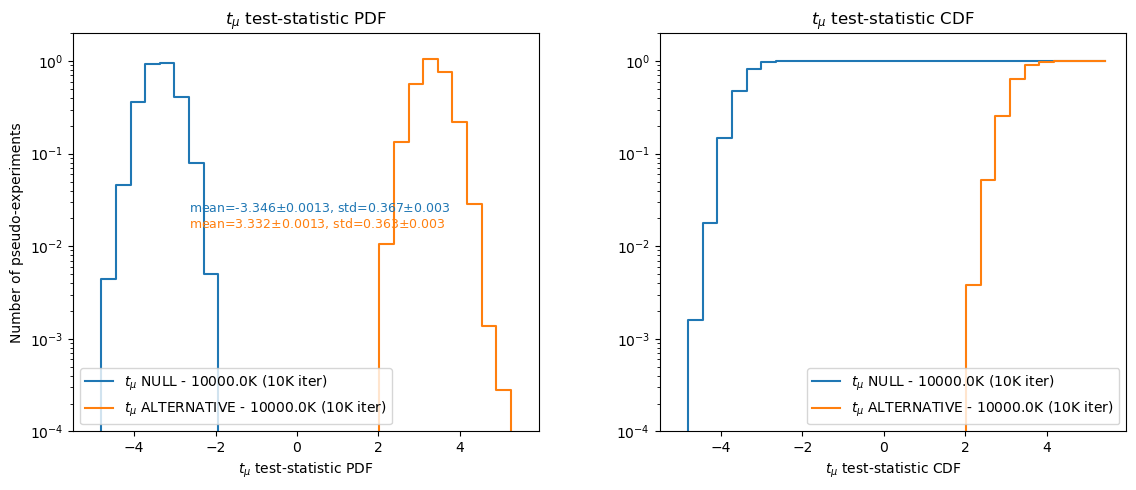

In [ ]:
scale = 'log'
num_bins = 30  # number of bins
niter = 10000

for nsamples in [100,1000,10000,100000,1000000,10000000]:
    # t_mu test-statistic for different values of nsamples
    dist_1 = ts_dist_null[nsamples][niter]/np.sqrt(nsamples/1000)
    dist_2 = ts_dist_alt[nsamples][niter]/np.sqrt(nsamples/1000)
    
    # Compute the mean and standard deviation of the sample and their standard errors
    mu1, deltamu1, sigma1, deltasigma1 = (np.mean(dist_1), se_mean(dist_1), np.std(dist_1), se_std(dist_1))
    mu2, deltamu2, sigma2, deltasigma2 = (np.mean(dist_2), se_mean(dist_2), np.std(dist_2), se_std(dist_2))
    
    # Minimum and maximum x values
    min_x = 1.1*min(np.concatenate((dist_1,dist_2),axis=0)) # lower limit of the binning
    max_x = 1.1*max(np.concatenate((dist_1,dist_2),axis=0)) # upper limit of the binning
    
    # Create an array of values
    x = np.linspace(min_x, max_x, num_bins + 1)
    
    # Create histogram for values and normalize counts to sum to 1
    counts1, bin_edges1 = np.histogram(dist_1, bins=x, density=True)
    cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
    counts2, bin_edges2 = np.histogram(dist_2, bins=x, density=True)
    cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
    
    # Get the bin centers
    bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    
    # Set up the figure and the two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Draw the first plot
    line1, = ax[0].plot(bin_centers1, counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    line2, = ax[0].plot(bin_centers2, counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[0].text(0.25, 0.58, f'mean={mu1:.3f}$\pm${deltamu1:.4f}, std={sigma1:.3f}$\pm${deltasigma1:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line1.get_color(), fontsize=9)
    ax[0].text(0.25, 0.54, f'mean={mu2:.3f}$\pm${deltamu2:.4f}, std={sigma2:.3f}$\pm${deltasigma2:.3f}', transform=ax[0].transAxes, verticalalignment='top', color=line4.get_color(), fontsize=9)
    ax[0].set_yscale(scale)
    ax[0].set_ylim(1e-4, 2)
    ax[0].set_xlabel('$t_{\mu}$ test-statistic PDF')
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('$t_{\mu}$ test-statistic PDF')
    ax[0].legend()
    
    # Draw the second plot
    ax[1].plot(bin_centers1, cum_counts1, linestyle = '-', label='$t_{\mu}$ NULL - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].plot(bin_centers2, cum_counts2, linestyle = '-', label='$t_{\mu}$ ALTERNATIVE - '+str(nsamples / 1000)+'K ('+str(niter // 1000)+'K iter)', drawstyle='steps-mid')
    ax[1].set_yscale(scale)
    ax[1].set_ylim(1e-4, 2)
    ax[1].set_xlabel('$t_{\mu}$ test-statistic CDF')
    ax[1].set_title('$t_{\mu}$ test-statistic CDF')
    ax[1].legend()
    
    # Adjust the width space
    plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking
    
    # Display the figure with the two subplots
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
from scipy.special import erfinv
import matplotlib.colors as colors

# Convert p-value to gaussian sigma (one-sided)
def p_to_sigma_one_sided(p):
    return np.sqrt(2)*erfinv(1-2*p)

# Convert p-value to gaussian sigma (two-sided)
def p_to_sigma_two_sided(p):
    return np.sqrt(2)*erfinv(1-p)

def highlight_significance(row, significance_value):
    color = 'background-color: green' if row['sigma_one_sided'] >= significance_value else ''
    return [color]*len(row)

# Initialize an empty list to store the results
results = []

observed_instance = 0

for nobserved in [100,1000,10000,100000,1000000,10000000]:
    for nsamples in [100,1000,10000,100000,1000000,10000000]:
        #for niter in [10, 100, 1000, 10000]:
        for niter in [10000]:
            null_dist = np.array(ts_dist_null[nsamples][niter]/np.sqrt(nsamples))
            observed_stat = (ts_dist_alt[nobserved][niter]/np.sqrt(nobserved))[observed_instance]
            p_value_one_sided = np.sum(null_dist >= observed_stat) / len(null_dist)
            p_value_two_sided = np.sum(np.abs(null_dist) >= np.abs(observed_stat)) / len(null_dist)

            # Append the results to the list as a dictionary
            results.append({
                'niter': niter,
                'nobserved': nobserved,
                'n_samples_toys': nsamples,
                'observed_stat': observed_stat,
                'mean_alt_dist': np.mean(ts_dist_alt[nobserved][niter]/np.sqrt(nobserved)),
                'std_alt_dist': np.std(ts_dist_alt[nobserved][niter]/np.sqrt(nobserved)),
                'mean_null_dist': np.mean(null_dist),
                'std_null_dist': np.std(null_dist),
                'p_value_one_sided': p_value_one_sided,
                'sigma_one_sided': p_to_sigma_one_sided(p_value_one_sided),
                #'p_value_two_sided': p_value_two_sided,
                #'sigma_two_sided': p_to_sigma_two_sided(p_value_two_sided)
            })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results).sort_values(by=['niter', 'nobserved', 'n_samples_toys'])

for nobserved in [100,1000,10000,100000,1000000,10000000]:
    df_style = df[df['nobserved'] == nobserved].copy()

    # Apply the color gradient to the new DataFrame based on the 'niter', 'nobserved', and 'n_samples_toys' columns in the original DataFrame
    df_style = df_style.style.apply(lambda row: highlight_significance(row, 3), axis=1).set_caption('<h2 style="color: red; font-size: 20px;">'+"nobserved = "+str(nobserved)+'</h2>')
    display(df_style)

,niter,nobserved,n_samples_toys,observed_stat,mean_alt_dist,std_alt_dist,mean_null_dist,std_null_dist,p_value_one_sided,sigma_one_sided
0,10000,100,100,-0.020286,0.000466,0.011425,-0.000547,0.011520,0.949900,-1.643885
1,10000,100,1000,-0.020286,0.000466,0.011425,-0.000984,0.011597,0.947600,-1.622016
2,10000,100,10000,-0.020286,0.000466,0.011425,-0.003294,0.011562,0.931100,-1.484034
3,10000,100,100000,-0.020286,0.000466,0.011425,-0.010579,0.011529,0.800600,-0.843766
4,10000,100,1000000,-0.020286,0.000466,0.011425,-0.033621,0.011514,0.122700,1.161595
5,10000,100,10000000,-0.020286,0.000466,0.011425,-0.105798,0.011605,0.000000,inf


,niter,nobserved,n_samples_toys,observed_stat,mean_alt_dist,std_alt_dist,mean_null_dist,std_null_dist,p_value_one_sided,sigma_one_sided
6,10000,1000,100,0.009721,0.001269,0.011436,-0.000547,0.011520,0.189800,0.878634
7,10000,1000,1000,0.009721,0.001269,0.011436,-0.000984,0.011597,0.178700,0.920331
8,10000,1000,10000,0.009721,0.001269,0.011436,-0.003294,0.011562,0.126700,1.142130
9,10000,1000,100000,0.009721,0.001269,0.011436,-0.010579,0.011529,0.038400,1.769563
10,10000,1000,1000000,0.009721,0.001269,0.011436,-0.033621,0.011514,0.000100,3.719016
11,10000,1000,10000000,0.009721,0.001269,0.011436,-0.105798,0.011605,0.000000,inf


,niter,nobserved,n_samples_toys,observed_stat,mean_alt_dist,std_alt_dist,mean_null_dist,std_null_dist,p_value_one_sided,sigma_one_sided
12,10000,10000,100,0.004762,0.003354,0.011505,-0.000547,0.011520,0.329300,0.441847
13,10000,10000,1000,0.004762,0.003354,0.011505,-0.000984,0.011597,0.313400,0.486236
14,10000,10000,10000,0.004762,0.003354,0.011505,-0.003294,0.011562,0.243800,0.694131
15,10000,10000,100000,0.004762,0.003354,0.011505,-0.010579,0.011529,0.091900,1.329145
16,10000,10000,1000000,0.004762,0.003354,0.011505,-0.033621,0.011514,0.000500,3.290527
17,10000,10000,10000000,0.004762,0.003354,0.011505,-0.105798,0.011605,0.000000,inf


,niter,nobserved,n_samples_toys,observed_stat,mean_alt_dist,std_alt_dist,mean_null_dist,std_null_dist,p_value_one_sided,sigma_one_sided
18,10000,100000,100,0.027186,0.010225,0.011489,-0.000547,0.011520,0.003400,2.706483
19,10000,100000,1000,0.027186,0.010225,0.011489,-0.000984,0.011597,0.006200,2.500552
20,10000,100000,10000,0.027186,0.010225,0.011489,-0.003294,0.011562,0.004000,2.652070
21,10000,100000,100000,0.027186,0.010225,0.011489,-0.010579,0.011529,0.000500,3.290527
22,10000,100000,1000000,0.027186,0.010225,0.011489,-0.033621,0.011514,0.000000,inf
23,10000,100000,10000000,0.027186,0.010225,0.011489,-0.105798,0.011605,0.000000,inf


,niter,nobserved,n_samples_toys,observed_stat,mean_alt_dist,std_alt_dist,mean_null_dist,std_null_dist,p_value_one_sided,sigma_one_sided
24,10000,1000000,100,0.022238,0.033271,0.011589,-0.000547,0.011520,0.017000,2.120072
25,10000,1000000,1000,0.022238,0.033271,0.011589,-0.000984,0.011597,0.021800,2.017916
26,10000,1000000,10000,0.022238,0.033271,0.011589,-0.003294,0.011562,0.015000,2.170090
27,10000,1000000,100000,0.022238,0.033271,0.011589,-0.010579,0.011529,0.001800,2.911238
28,10000,1000000,1000000,0.022238,0.033271,0.011589,-0.033621,0.011514,0.000000,inf
29,10000,1000000,10000000,0.022238,0.033271,0.011589,-0.105798,0.011605,0.000000,inf


,niter,nobserved,n_samples_toys,observed_stat,mean_alt_dist,std_alt_dist,mean_null_dist,std_null_dist,p_value_one_sided,sigma_one_sided
30,10000,10000000,100,0.100545,0.105377,0.011476,-0.000547,0.011520,0.000000,inf
31,10000,10000000,1000,0.100545,0.105377,0.011476,-0.000984,0.011597,0.000000,inf
32,10000,10000000,10000,0.100545,0.105377,0.011476,-0.003294,0.011562,0.000000,inf
33,10000,10000000,100000,0.100545,0.105377,0.011476,-0.010579,0.011529,0.000000,inf
34,10000,10000000,1000000,0.100545,0.105377,0.011476,-0.033621,0.011514,0.000000,inf
35,10000,10000000,10000000,0.100545,0.105377,0.011476,-0.105798,0.011605,0.000000,inf


### 1D Kolmogorov-Smirnov (Numpy) - CHECK

#### Null vs alternative hypotheses evaluations

In [ ]:
ndims = 1
seed = 0
epsilon = 0.2
loc0 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
scale0 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
loc1 = np.array(np.random.uniform(-epsilon,epsilon,ndims),dtype=np.float64)
scale1 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
dist0 = GMetrics.utils.NumpyDistribution('multivariate_normal', mean = loc0, cov = np.diag(scale0**2))
dist1 = GMetrics.utils.NumpyDistribution('multivariate_normal', mean = loc1, cov = np.diag(scale0**2))
print(dist0.dtype, dist1.dtype)

<class 'numpy.float32'> <class 'numpy.float32'>


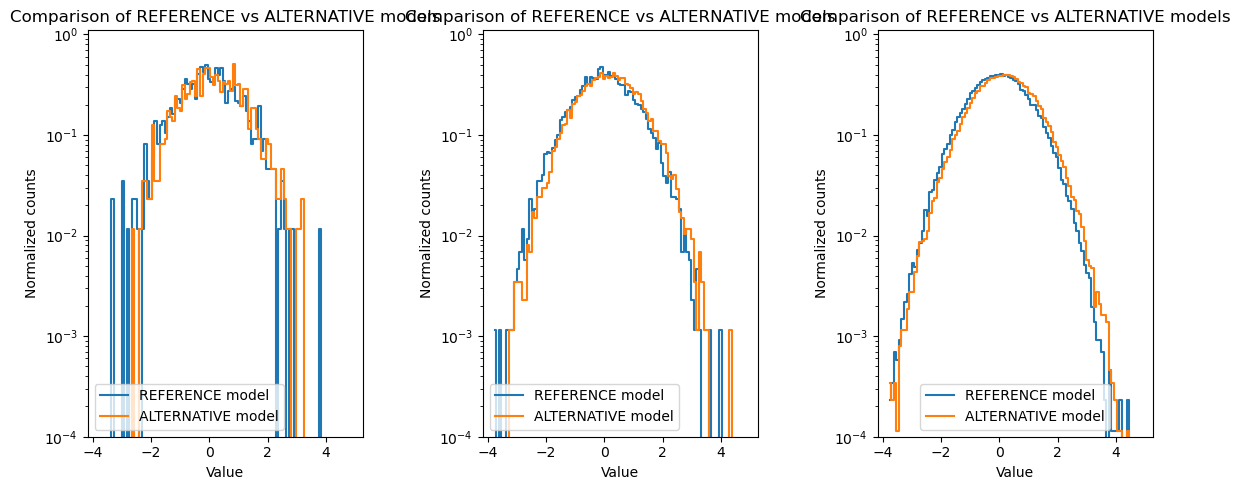

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples1 = 1000
nsamples2 = 10000
nsamples3 = 100000

# KS statistic for different values of the 'niter' parameter
sample0 = dist0.sample(nsamples1)[:,0]
sample1 = dist1.sample(nsamples1)[:,0]

sample2 = dist0.sample(nsamples2)[:,0]
sample3 = dist1.sample(nsamples2)[:,0]

sample4 = dist0.sample(nsamples3)[:,0]
sample5 = dist1.sample(nsamples3)[:,0]

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((sample4,sample5),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((sample4,sample5),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Create histogram for values and normalize counts to sum to 1
counts0, bin_edges = np.histogram(sample0, bins=x, density=True)
counts1, bin_edges = np.histogram(sample1, bins=x, density=True)
counts2, bin_edges = np.histogram(sample2, bins=x, density=True)
counts3, bin_edges = np.histogram(sample3, bins=x, density=True)
counts4, bin_edges = np.histogram(sample4, bins=x, density=True)
counts5, bin_edges = np.histogram(sample5, bins=x, density=True)

# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers, counts0, '-',label='REFERENCE model', drawstyle='steps-mid')
ax[0].plot(bin_centers, counts1, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 1.1)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Normalized counts')
ax[0].set_title('Comparison of REFERENCE vs ALTERNATIVE models')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers, counts2, '-',label='REFERENCE model', drawstyle='steps-mid')
ax[1].plot(bin_centers, counts3, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 1.1)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Normalized counts')
ax[1].set_title('Comparison of REFERENCE vs ALTERNATIVE models')
ax[1].legend()

# Draw the third plot
ax[2].plot(bin_centers, counts4, '-',label='REFERENCE model', drawstyle='steps-mid')
ax[2].plot(bin_centers, counts5, '-',label='ALTERNATIVE model', drawstyle='steps-mid')
ax[2].set_yscale(scale)
ax[2].set_ylim(1e-4, 1.1)
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Normalized counts')
ax[2].set_title('Comparison of REFERENCE vs ALTERNATIVE models')
ax[2].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import moment

def se_mean(data):
    n = len(data)
    mu_2 = moment(data, moment=2)  # second central moment (variance)
    se_mean = mu_2 / np.sqrt(n)
    return se_mean

def se_std(data):
    n = len(data)
    mu_2 = moment(data, moment=2)  # second central moment (variance)
    mu_4 = moment(data, moment=4)  # fourth central moment
    se_std = np.sqrt((mu_4 - mu_2**2) / (4 * mu_2 * n))
    return se_std

mu0, deltamu0, sigma0, deltasigma0 = (np.mean(sample0), se_mean(sample0), np.std(sample0), se_std(sample0))
mu1, deltamu1, sigma1, deltasigma1 = (np.mean(sample1), se_mean(sample1), np.std(sample1), se_std(sample1))
mu2, deltamu2, sigma2, deltasigma2 = (np.mean(sample2), se_mean(sample2), np.std(sample2), se_std(sample2))
mu3, deltamu3, sigma3, deltasigma3 = (np.mean(sample3), se_mean(sample3), np.std(sample3), se_std(sample3))
mu4, deltamu4, sigma4, deltasigma4 = (np.mean(sample4), se_mean(sample4), np.std(sample4), se_std(sample4))
mu5, deltamu5, sigma5, deltasigma5 = (np.mean(sample5), se_mean(sample5), np.std(sample5), se_std(sample5))

In [ ]:
print(f'{"Sample Size":<12} {"Mean":<10} {"Delta Mean":<10} {"Std Dev":<10} {"Delta Std Dev":<10}')
print(f'{nsamples1:<12} {mu0:<10.3f} {deltamu0:<10.3f} {sigma0:<10.3f} {deltasigma0:<10.3f}')
print(f'{nsamples1:<12} {mu1:<10.3f} {deltamu1:<10.3f} {sigma1:<10.3f} {deltasigma1:<10.3f}')
print(f'{nsamples2:<12} {mu2:<10.3f} {deltamu2:<10.3f} {sigma2:<10.3f} {deltasigma2:<10.3f}')
print(f'{nsamples2:<12} {mu3:<10.3f} {deltamu3:<10.3f} {sigma3:<10.3f} {deltasigma3:<10.3f}')
print(f'{nsamples3:<12} {mu4:<10.3f} {deltamu4:<10.3f} {sigma4:<10.3f} {deltasigma4:<10.3f}')
print(f'{nsamples3:<12} {mu5:<10.3f} {deltamu5:<10.3f} {sigma5:<10.3f} {deltasigma5:<10.3f}')

Sample Size  Mean       Delta Mean Std Dev    Delta Std Dev
1000         0.060      0.033      1.018      0.021     
1000         0.022      0.030      0.980      0.021     
10000        -0.009     0.010      1.007      0.007     
10000        -0.017     0.010      1.003      0.007     
100000       0.000      0.003      1.000      0.002     
100000       0.003      0.003      0.999      0.002     


In [ ]:
TwoSampleTestInputsReference = GMetrics.TwoSampleTestInputs(dist_1_input = dist0,
                                                            dist_2_input = dist0,
                                                            niter = 1000,
                                                            batch_size = 10000,
                                                            dtype_input = tf.float64,
                                                            seed_input = 0,
                                                            use_tf = False,
                                                            verbose = True)
print("nsamples",TwoSampleTestInputsReference.nsamples)
print("batch_size",TwoSampleTestInputsReference.batch_size)
print("niter",TwoSampleTestInputsReference.niter)
print("niter * batch_size",TwoSampleTestInputsReference.niter*TwoSampleTestInputsReference.batch_size)
print("small_sample",TwoSampleTestInputsReference.small_sample)

Parsing input distribution...
Input distribution is a NumpyDistribution object.
Parsing input distribution...
Input distribution is a NumpyDistribution object.
nsamples 10000000
batch_size 10000
niter 1000
niter * batch_size 10000000
small_sample True


In [ ]:
KSTestReference = GMetrics.KSTest(TwoSampleTestInputsReference,
                                  verbose = True)

In [ ]:
for batch_size in [1000,10000,100000]:
    for niter in [10,100,1000,10000]:
            print("\n========================================")
            KSTestReference.Inputs.batch_size = batch_size
            KSTestReference.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running NP test...")
            KSTestReference.Test_np()


niter: 10
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 10
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 0.006742273981217295 seconds.

niter: 100
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 100
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 0.04694553796434775 seconds.

niter: 1000
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 1000
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 0.4718035390251316 seconds.

niter: 10000
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 10000
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 4.726942147011869 seconds.

niter

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
df = pd.DataFrame(KSTestReference.Results.results_df)
display(df)

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-27T07:42:52.084581,KS Test_np,"[[0.034, 0.6101665], [0.05, 0.16411448], [0.03...",True,True,1,10,1000,float32,True,10,1000,0.006742,numpy
0,2023-07-27T07:43:06.214440,KS Test_np,"[[0.0126, 0.4053569], [0.0176, 0.09030615], [0...",True,True,1,10,10000,float32,True,10,10000,0.042045,numpy
0,2023-07-27T07:42:52.825316,KS Test_np,"[[0.045, 0.26347172], [0.05, 0.16411448], [0.0...",True,True,1,100,1000,float32,True,100,1000,0.046946,numpy
0,2023-07-27T07:44:00.844703,KS Test_np,"[[0.00446, 0.27211598], [0.00579, 0.06972647],...",True,True,1,10,100000,float32,True,10,100000,0.25286,numpy
0,2023-07-27T07:43:06.716881,KS Test_np,"[[0.0181, 0.075545385], [0.0201, 0.035188768],...",True,True,1,100,10000,float32,True,100,10000,0.406973,numpy
0,2023-07-27T07:42:53.381825,KS Test_np,"[[0.035, 0.57289046], [0.038, 0.46595952], [0....",True,True,1,1000,1000,float32,True,1000,1000,0.471804,numpy
0,2023-07-27T07:44:04.436143,KS Test_np,"[[0.0047, 0.21864636], [0.00404, 0.38707274], ...",True,True,1,100,100000,float32,True,100,100000,2.782055,numpy
0,2023-07-27T07:43:11.593562,KS Test_np,"[[0.0078, 0.921279], [0.0165, 0.13138497], [0....",True,True,1,1000,10000,float32,True,1000,10000,4.072195,numpy
0,2023-07-27T07:42:58.920795,KS Test_np,"[[0.037, 0.5005674], [0.03, 0.75936955], [0.04...",True,True,1,10000,1000,float32,True,10000,1000,4.726942,numpy
0,2023-07-27T07:44:40.113561,KS Test_np,"[[0.00491, 0.17877018], [0.00437, 0.29443935],...",True,True,1,1000,100000,float32,True,1000,100000,27.680905,numpy


In [ ]:
TwoSampleTestInputsAlternative = GMetrics.TwoSampleTestInputs(dist_1_input = dist0,
                                                              dist_2_input = dist1,
                                                              niter = 1000,
                                                              batch_size = 10000,
                                                              dtype_input = tf.float64,
                                                              seed_input = 0,
                                                              use_tf = True,
                                                              verbose = True)
print("nsamples",TwoSampleTestInputsAlternative.nsamples)
print("batch_size",TwoSampleTestInputsAlternative.batch_size)
print("niter",TwoSampleTestInputsAlternative.niter)
print("niter * batch_size",TwoSampleTestInputsAlternative.niter*TwoSampleTestInputsAlternative.batch_size)
print("small_sample",TwoSampleTestInputsAlternative.small_sample)

To use tf mode, please use tf distributions or numerical tensors/arrays.
Parsing input distribution...
Input distribution is a NumpyDistribution object.
Parsing input distribution...
Input distribution is a NumpyDistribution object.
nsamples 10000000
batch_size 10000
niter 1000
niter * batch_size 10000000
small_sample True


In [ ]:
KSTestAlternative = GMetrics.KSTest(TwoSampleTestInputsAlternative,
                                    verbose = True)

In [ ]:
for batch_size in [1000,10000,100000]:
    for niter in [10,100,1000,10000]:
            print("\n========================================")
            KSTestAlternative.Inputs.batch_size = batch_size
            KSTestAlternative.Inputs.niter = niter
            print("niter:", niter)
            print("batch_size:", batch_size)
            print("----------------------------------------")
            print("Running NP test...")
            KSTestAlternative.Test_np()


niter: 10
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 10
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 0.004970718990080059 seconds.

niter: 100
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 100
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 0.04663724999409169 seconds.



niter: 1000
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 1000
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 0.46639444801257923 seconds.

niter: 10000
batch_size: 1000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 10000
batch_size = 1000
Running numpy KS tests...
Two-sample test calculation completed in 4.650261115981266 seconds.

niter: 10
batch_size: 10000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 10
batch_size = 10000
Running numpy KS tests...
Two-sample test calculation completed in 0.04188341600820422 seconds.

niter: 100
batch_size: 10000
----------------------------------------
Running NP test...
Starting KS tests calculation...
niter = 100
batch_size = 10000
Running numpy KS tests...
Two-sample test calculation completed in 0.4155270679621026 seconds.

nit

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
df = pd.DataFrame(KSTestAlternative.Results.results_df)
display(df)

,timestamp,test_name,result_value,is_symb_1,is_symb_2,ndims,niter,batch_size,dtype,small_sample,niter_used,batch_size_used,computing_time,backend
0,2023-07-27T07:49:55.667536,KS Test_np,"[[0.097, 0.00016232042], [0.08, 0.0033110569],...",True,True,1,10,1000,float32,True,10,1000,0.004971,numpy
0,2023-07-27T07:50:09.024443,KS Test_np,"[[0.0697, 1.5365771e-21], [0.0751, 6.094375e-2...",True,True,1,10,10000,float32,True,10,10000,0.041883,numpy
0,2023-07-27T07:49:55.731891,KS Test_np,"[[0.106, 2.5975902e-05], [0.108, 1.6907221e-05...",True,True,1,100,1000,float32,True,100,1000,0.046637,numpy
0,2023-07-27T07:50:09.521184,KS Test_np,"[[0.073, 1.3741622e-23], [0.071, 2.4598677e-22...",True,True,1,100,10000,float32,True,100,10000,0.415527,numpy
0,2023-07-27T07:49:56.279432,KS Test_np,"[[0.084, 0.0017162135], [0.078, 0.004543822], ...",True,True,1,1000,1000,float32,True,1000,1000,0.466394,numpy
0,2023-07-27T07:51:05.382266,KS Test_np,"[[0.06395, 0.0], [0.06687, 0.0], [0.06336, 0.0...",True,True,1,10,100000,float32,True,10,100000,0.786491,numpy
0,2023-07-27T07:50:14.473480,KS Test_np,"[[0.0735, 6.597243e-24], [0.0602, 3.5751342e-1...",True,True,1,1000,10000,float32,True,1000,10000,4.142608,numpy
0,2023-07-27T07:50:01.741065,KS Test_np,"[[0.072, 0.011189903], [0.057, 0.07761108], [0...",True,True,1,10000,1000,float32,True,10000,1000,4.650261,numpy
0,2023-07-27T07:51:14.027568,KS Test_np,"[[0.06631, 0.0], [0.06564, 0.0], [0.06687, 0.0...",True,True,1,100,100000,float32,True,100,100000,7.83748,numpy
0,2023-07-27T07:51:04.513484,KS Test_np,"[[0.0694, 2.3338311e-21], [0.0713, 1.6040096e-...",True,True,1,10000,10000,float32,True,10000,10000,42.057615,numpy


#### Comparing KS-1K hypotheses

##### NULL hypothesis

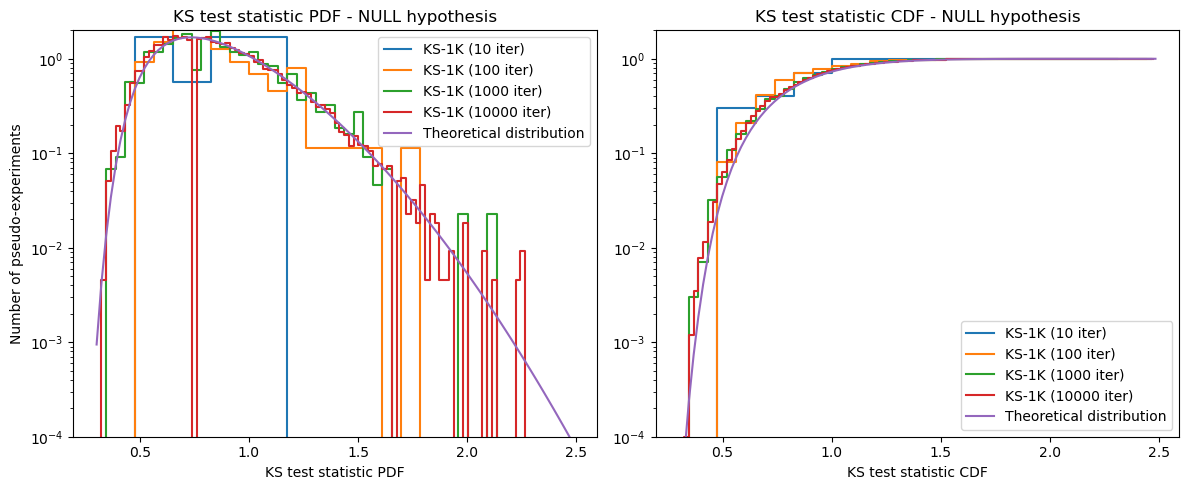

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()


##### ALTERNATIVE hypothesis

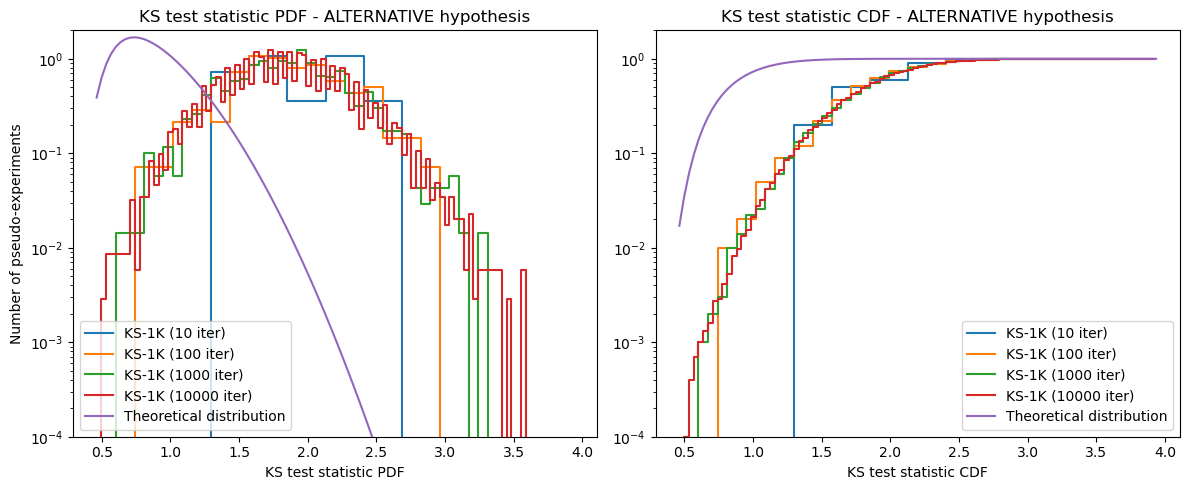

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - ALTERNATIVE hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - ALTERNATIVE hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

##### NULL vs ALTERNATIVE hypotheses

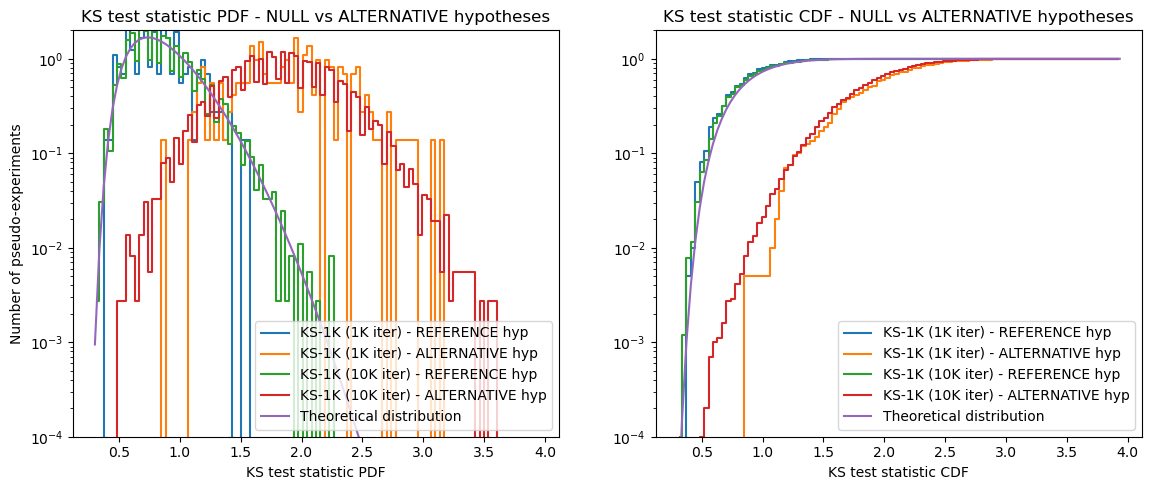

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 1000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1[::5], bins=x, density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x, density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3[::5], bins=x, density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL vs ALTERNATIVE hypotheses')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL vs ALTERNATIVE hypotheses')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

In [ ]:
print(ks_2samp(ks_stats_1,ks_stats_3))
print(ks_2samp(ks_stats_2,ks_stats_4))

KstestResult(statistic=0.843, pvalue=0.0, statistic_location=1.2298374, statistic_sign=1)
KstestResult(statistic=0.834, pvalue=0.0, statistic_location=1.2521981, statistic_sign=1)


#### Comparing KS-10K hypotheses

##### NULL hypothesis

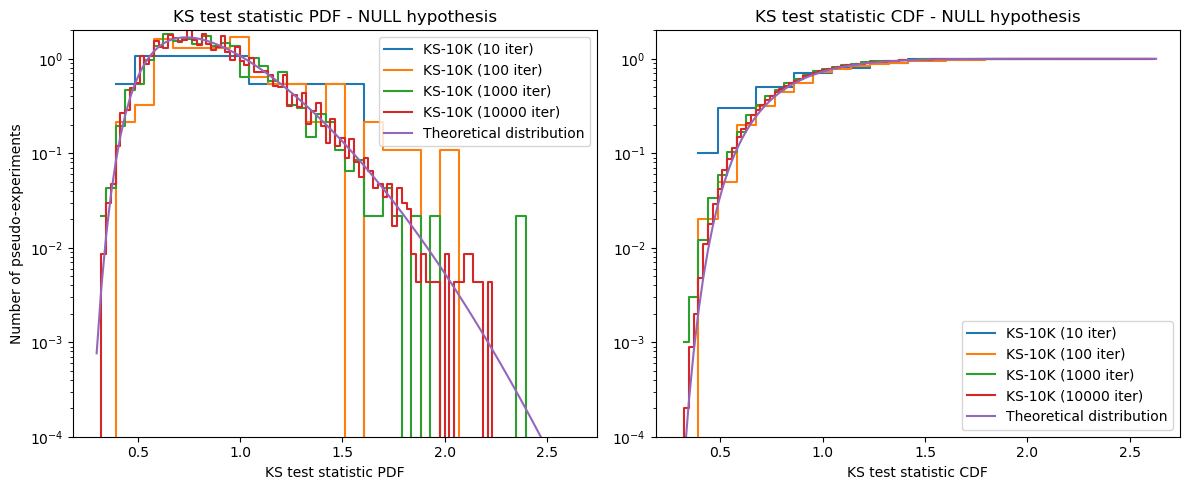

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 10000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()


##### ALTERNATIVE hypothesis

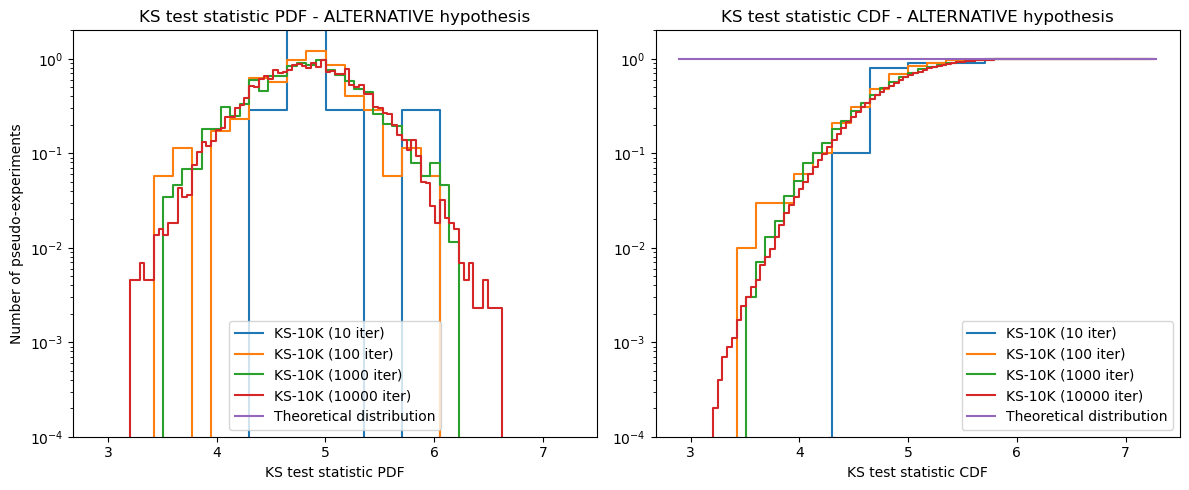

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 10000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - ALTERNATIVE hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - ALTERNATIVE hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

##### NULL vs ALTERNATIVE hypotheses

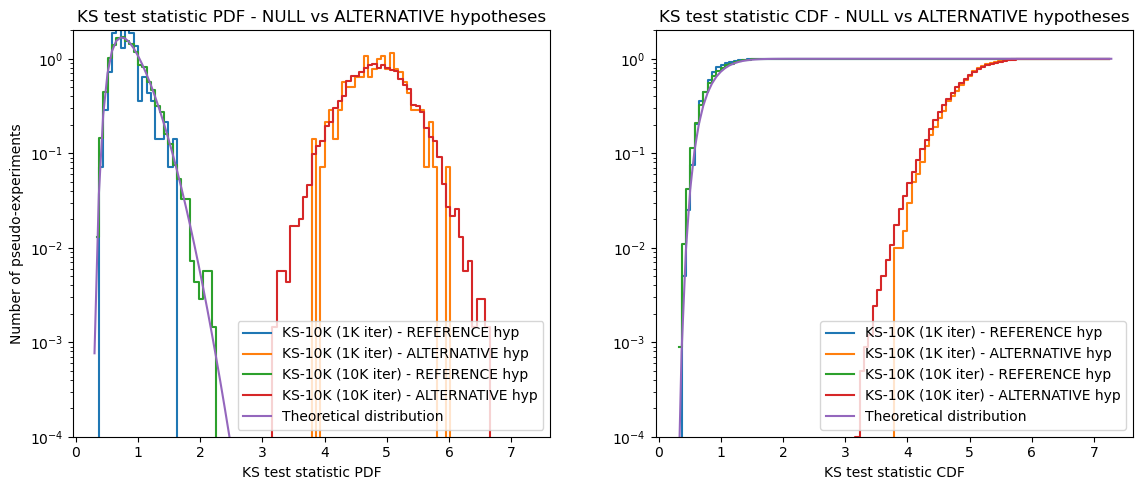

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 10000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1[::5], bins=x, density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x, density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3[::5], bins=x, density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL vs ALTERNATIVE hypotheses')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL vs ALTERNATIVE hypotheses')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

In [ ]:
print(ks_2samp(ks_stats_1,ks_stats_3))
print(ks_2samp(ks_stats_2,ks_stats_4))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2.3900208, statistic_sign=1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2.2203152, statistic_sign=1)


#### Comparing KS-100K hypotheses

##### NULL hypothesis

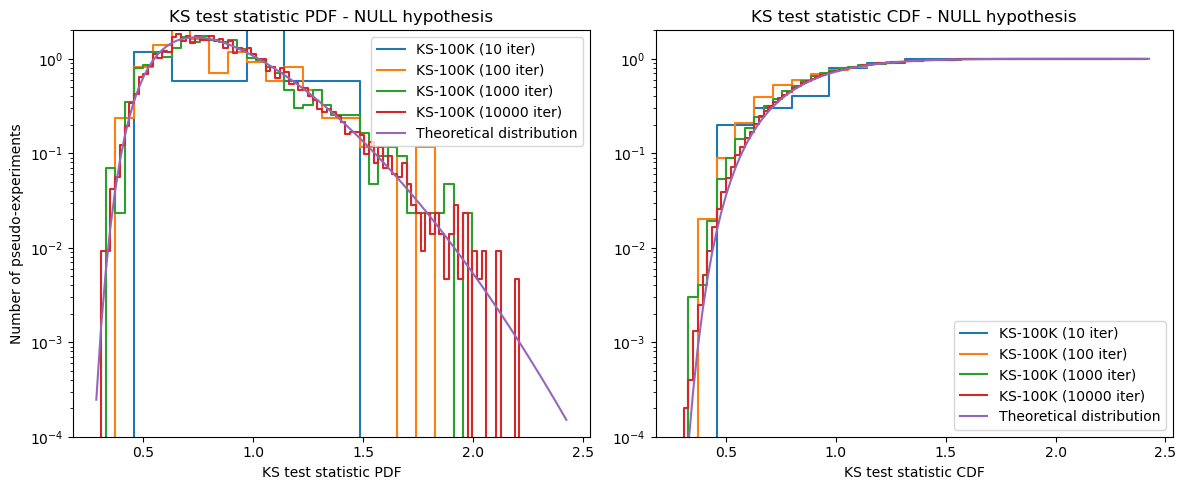

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 100000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()


##### ALTERNATIVE hypothesis

In [ ]:
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
print(df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0])

[0.06162 0.06652 0.05973 ... 0.06481 0.06356 0.06446]


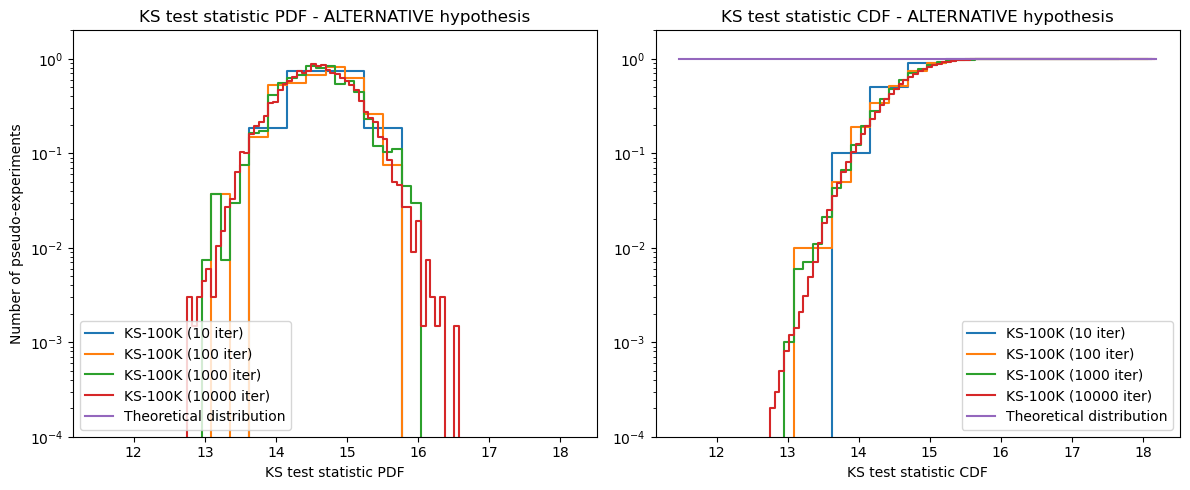

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 100000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])

# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 10]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 100]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x[::8], density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x[::4], density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x[::2], density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - ALTERNATIVE hypothesis')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(100)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(1000)+' iter)', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K ('+str(10000)+' iter)', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - ALTERNATIVE hypothesis')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

##### NULL vs ALTERNATIVE hypotheses

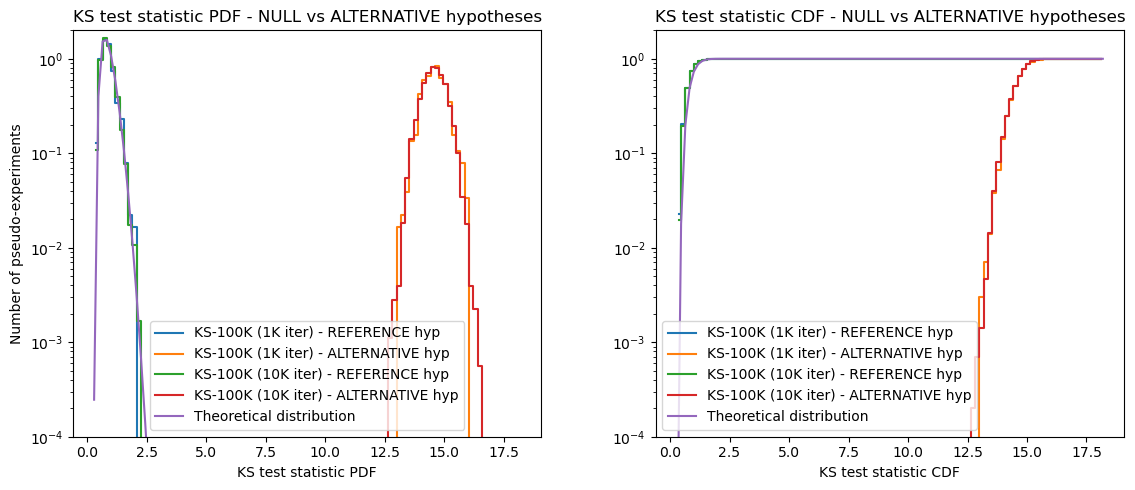

In [ ]:
scale = 'log'
num_bins = 100  # number of bins
nsamples = 100000
ns = nsamples**2 /(2*nsamples)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestReference.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_1 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_2 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Extract the results from the dataframe
df = pd.DataFrame(KSTestAlternative.Results.results_df)
df_reduced = pd.DataFrame(df[df['batch_size'] == nsamples])
# KS statistic for different values of the 'niter' parameter
ks_stats_3 = df_reduced[df_reduced["niter"] == 1000]["result_value"].values[0][:,0]*np.sqrt(ns)
ks_stats_4 = df_reduced[df_reduced["niter"] == 10000]["result_value"].values[0][:,0]*np.sqrt(ns)

# Minimum and maximum x values
min_x = 0.9*min(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # lower limit of the binning
max_x = 1.1*max(np.concatenate((ks_stats_1,ks_stats_2,ks_stats_3,ks_stats_4),axis=0)) # upper limit of the binning

# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)

# Calculate the theoretical CDF for each x value
theoretical_cdf = kstwobign.cdf(x)
theoretical_pdf = kstwobign.pdf(x)

# Create histogram for values and normalize counts to sum to 1
counts1, bin_edges1 = np.histogram(ks_stats_1, bins=x, density=True)
cum_counts1 = np.cumsum(counts1)/np.sum(counts1)
counts2, bin_edges2 = np.histogram(ks_stats_2, bins=x, density=True)
cum_counts2 = np.cumsum(counts2)/np.sum(counts2)
counts3, bin_edges3 = np.histogram(ks_stats_3, bins=x, density=True)
cum_counts3 = np.cumsum(counts3)/np.sum(counts3)
counts4, bin_edges4 = np.histogram(ks_stats_4, bins=x, density=True)
cum_counts4 = np.cumsum(counts4)/np.sum(counts4)

# Get the bin centers
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:]) / 2

# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Draw the first plot
ax[0].plot(bin_centers1, counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers3, counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers2, counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[0].plot(bin_centers4, counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf, label='Theoretical distribution')
ax[0].set_yscale(scale)
ax[0].set_ylim(1e-4, 2)
ax[0].set_xlabel('KS test statistic PDF')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('KS test statistic PDF - NULL vs ALTERNATIVE hypotheses')
ax[0].legend()

# Draw the second plot
ax[1].plot(bin_centers1, cum_counts1, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers3, cum_counts3, '-',label='KS-'+str(nsamples // 1000)+'K (1K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers2, cum_counts2, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - REFERENCE hyp', drawstyle='steps-mid')
ax[1].plot(bin_centers4, cum_counts4, '-',label='KS-'+str(nsamples // 1000)+'K (10K iter) - ALTERNATIVE hyp', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf, label='Theoretical distribution')
ax[1].set_yscale(scale)
ax[1].set_ylim(1e-4, 2)
ax[1].set_xlabel('KS test statistic CDF')
#ax[1].set_ylabel('Number of pseudo-experiments')
ax[1].set_title('KS test statistic CDF - NULL vs ALTERNATIVE hypotheses')
ax[1].legend()

# Adjust the width space
plt.subplots_adjust(wspace=1.5)  # Adjust this value to your liking

# Display the figure with the two subplots
plt.tight_layout()
plt.show()

In [ ]:
print(ks_2samp(ks_stats_1,ks_stats_3))
print(ks_2samp(ks_stats_2,ks_stats_4))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1.9699758, statistic_sign=1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2.204763, statistic_sign=1)


# 3. Usage with numberic tensors inputs

## 3.1 Define distribution

In [6]:
ncomp = 3
ndims = 100
seed = 0
epsilon = 0.2
loc1 = np.full(ndims,0.0,dtype=np.float32)
scale1 = np.full(ndims,1.0,dtype=np.float32)
loc2 = np.full(ndims,np.random.uniform(-epsilon,epsilon),dtype=np.float32)
scale2 = np.full(ndims,np.random.uniform(1.0-epsilon,1.0+epsilon),dtype=np.float32)
dist_1_symb = tfp.distributions.Normal(loc=loc1, scale=scale1)
dist_2_symb = tfp.distributions.Normal(loc=loc2, scale=scale2)
#dist = MixtureDistributions.MixtureGaussian(ncomp,ndims,seed)
print("dist1.dtype: ",dist_1_symb.dtype)
print("dist2.dtype: ",dist_2_symb.dtype)

dist1.dtype:  <dtype: 'float32'>
dist2.dtype:  <dtype: 'float32'>


In [7]:
dist_1_num = tf.cast(dist_1_symb.sample(1e6),tf.float32)#.numpy()
dist_2_num = tf.cast(dist_2_symb.sample(1e6),tf.float32)#.numpy()

## Define Test objects

In [8]:
TwoSampleTestInputs_tf = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_num,
                                                      dist_2_input = dist_2_num,
                                                      niter = 10,
                                                      batch_size = 100000,
                                                      dtype_input = tf.float32,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      verbose = True)
print("nsamples",TwoSampleTestInputs_tf.nsamples)
print("batch_size",TwoSampleTestInputs_tf.batch_size)
print("niter",TwoSampleTestInputs_tf.niter)
print("niter * batch_size",TwoSampleTestInputs_tf.niter*TwoSampleTestInputs_tf.batch_size)
print("small_sample",TwoSampleTestInputs_tf.small_sample)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
nsamples 1000000
batch_size 100000
niter 10
niter * batch_size 1000000
small_sample True


In [9]:
KSTest_tf = GMetrics.KSTest(TwoSampleTestInputs_tf,
                            verbose = True)
SWDMetric_tf = GMetrics.SWDMetric(TwoSampleTestInputs_tf,
                                  verbose = True)
FNMetric_tf = GMetrics.FNMetric(TwoSampleTestInputs_tf,
                                verbose = True)

In [10]:
KSTest_tf.Test_np()
SWDMetric_tf.Test_np()
FNMetric_tf.Test_np()

Starting KS tests calculation...
niter = 10
batch_size = 100000
Running numpy KS tests...
Two-sample test calculation completed in 89.67785955104046 seconds.
Starting SWD metric calculation...
niter = 10
batch_size = 100000
Running numpy SWD calculation...
Two-sample test calculation completed in 126.11964761291165 seconds.
Starting FN metric calculation...
niter = 10
batch_size = 100000
Running numpy FN calculation...
Two-sample test calculation completed in 1.3961289410945028 seconds.


In [11]:
KSTest_tf.Results[-1].result_value.keys()

dict_keys(['statistic_lists', 'statistic_means', 'statistic_stds', 'pvalue_lists', 'pvalue_means', 'pvalue_stds'])

In [12]:
SWDMetric_tf.Results[-1].result_value.keys()

dict_keys(['metric_lists', 'metric_means', 'metric_stds'])

In [13]:
FNMetric_tf.Results[-1].result_value.keys()

dict_keys(['metric_list'])

In [14]:
KSTest_tf.Test_tf()
SWDMetric_tf.Test_tf()
FNMetric_tf.Test_tf()

Starting KS tests calculation...
Running TF KS tests...
niter = 10
batch_size = 100000
Running compute_test
KS tests calculation completed in 7.1858063149265945 seconds.
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 10
batch_size = 100000
Running compute_test
SWD metric calculation completed in 2.760827624006197 seconds.
Starting FN metric calculation...
Running TF FN calculation...
niter = 10
batch_size = 100000
Running compute_test
FN metric calculation completed in 1.335139365051873 seconds.


In [15]:
KSTest_tf.Results[-1].result_value.keys()

dict_keys(['statistic_lists', 'statistic_means', 'statistic_stds', 'pvalue_lists', 'pvalue_means', 'pvalue_stds'])

In [16]:
SWDMetric_tf.Results[-1].result_value.keys()

dict_keys(['metric_lists', 'metric_means', 'metric_stds'])

In [27]:
SWDMetric_tf.Results[-1].result_value['metric_lists']

array([[0.01922106, 0.06766232, 0.14071658, 0.05594141, 0.05370592,
        0.04164087, 0.20808373, 0.10118573, 0.10700412, 0.0446986 ,
        0.06045355, 0.05208153, 0.00934774, 0.03168837, 0.08534125,
        0.18214777, 0.11119539, 0.02830198, 0.02642369, 0.18280588,
        0.03102321, 0.04340563, 0.05929325, 0.06540845, 0.11815793,
        0.16746941, 0.08880102, 0.01615711, 0.29817423, 0.09418654,
        0.10888283, 0.10642765, 0.01806118, 0.11713831, 0.19537316,
        0.14331491, 0.1668031 , 0.01453409, 0.295731  , 0.03748426,
        0.10862303, 0.24203016, 0.03750325, 0.04581892, 0.06462994,
        0.06274537, 0.04983146, 0.01437018, 0.01229244, 0.20269617,
        0.05900686, 0.01941729, 0.03599688, 0.02554964, 0.10487341,
        0.08069312, 0.07750139, 0.02704792, 0.04126921, 0.03925586,
        0.01138011, 0.02245113, 0.15466918, 0.02613023, 0.13669679,
        0.02056951, 0.04456798, 0.12458527, 0.09092953, 0.20757705,
        0.03671928, 0.02339375, 0.12991093, 0.05

In [17]:
FNMetric_tf.Results[-1].result_value.keys()

dict_keys(['metric_list'])